In [369]:
# 1. reading and understanding data
# 2. Data inspection and Visualising data
# 3. EDA - univariate, bivariate and multivariate analysis
# 4. Train and test Split
# 5. Preparing Data for modeling (Missing value imputation)
# 6. Scaling if required 
# 7. Modeling 
# 8. Tuning the Model
# 9. Residual analysis
# 10. Prediction and evaluation on the test set

# Reading and Understanding the data

In [370]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, scale
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [371]:
df_original = pd.read_csv("train.csv")
df_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [372]:
df_original.shape

(1460, 81)

In [373]:
    df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [374]:
df_original.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# lets Visualise the data

In [375]:
# visualising the Numeric variable
#sns.pairplot(df_original)
#plt.show()

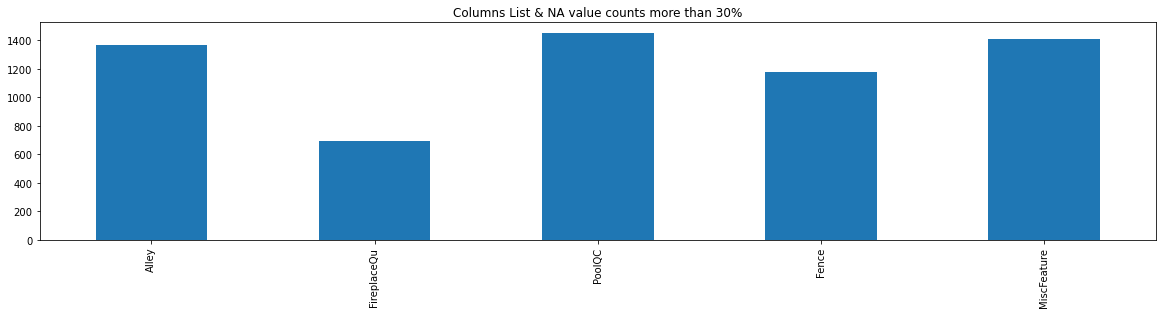

In [376]:
NA_col = df_original.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(df_original))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts more than 30%')
plt.show()

In [377]:
# we have large number of columns in the Data set with 81 columns 
# It will be very difficult to impute values for missing values for all 81 columns.
# lets us find column which are having Null values more than 30% 

NA_col[NA_col.values >(0.3*len(df_original))]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [378]:
df_original.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [379]:
# lets drop columns which are havng missing values more than 30%
# also drop the id
df_original = df_original.drop(['Id','Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],1)


df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [380]:
# check and Remove all columns with only one unique value.
unique = df_original.nunique()
unique = unique[unique.values == 1]

print(unique)

Series([], dtype: int64)


#### let see how the classes are distributed for each Categorical variable

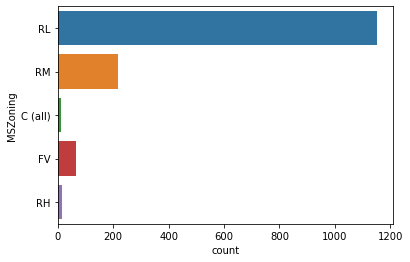

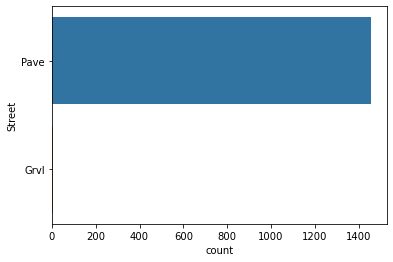

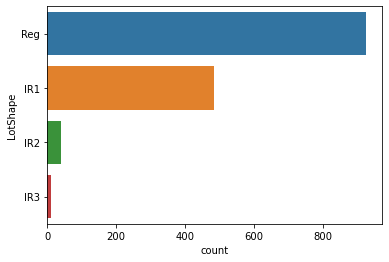

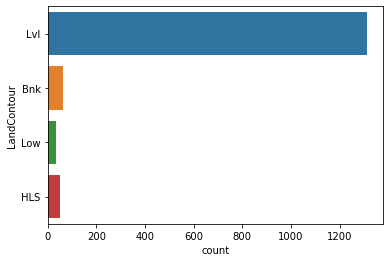

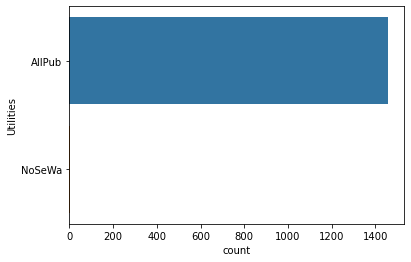

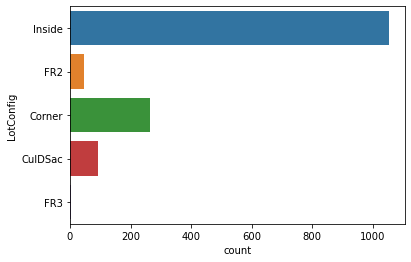

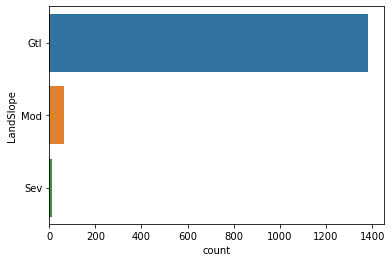

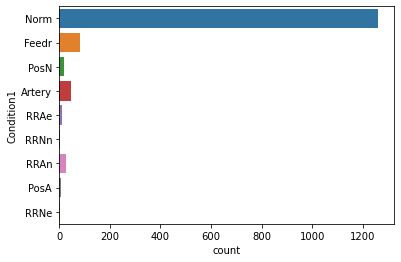

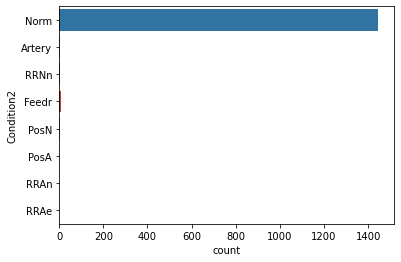

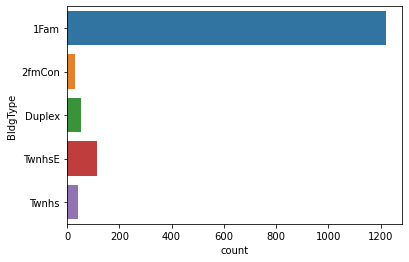

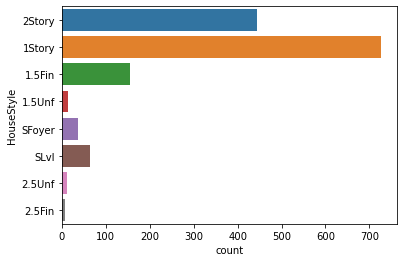

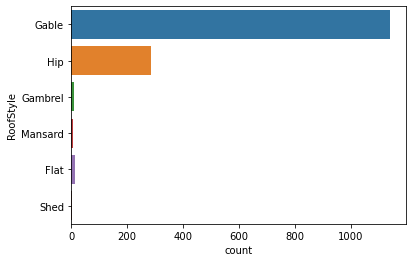

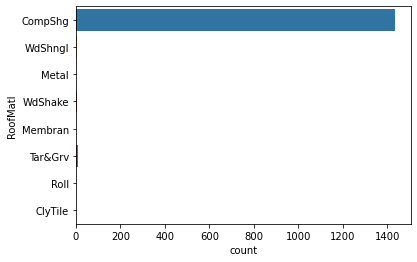

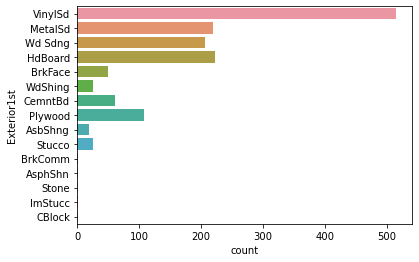

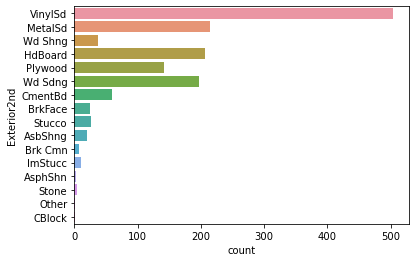

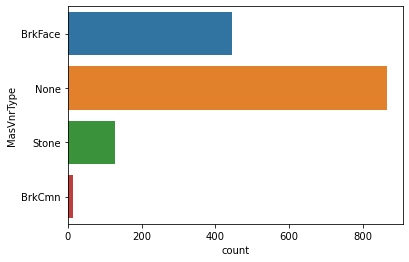

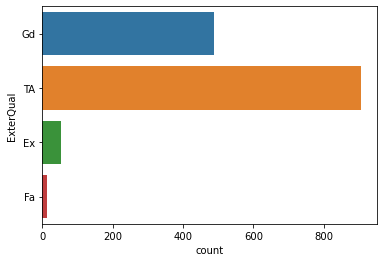

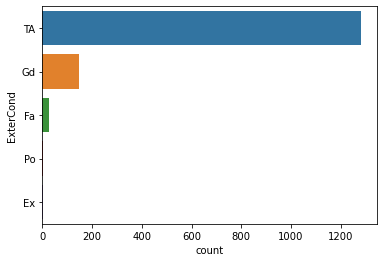

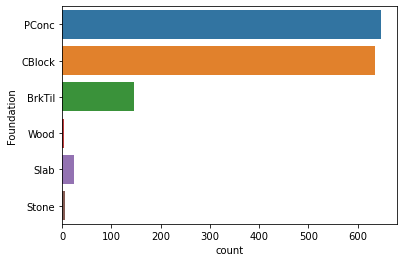

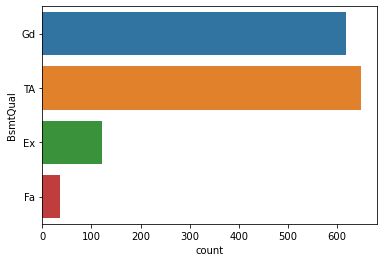

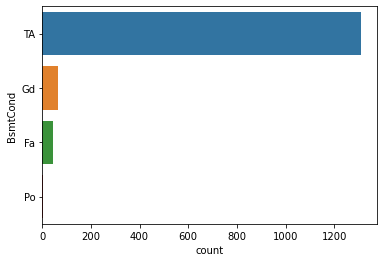

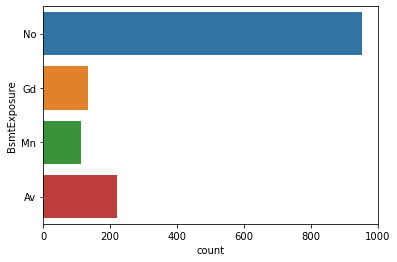

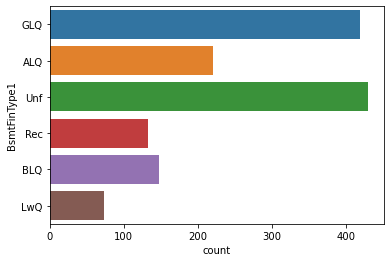

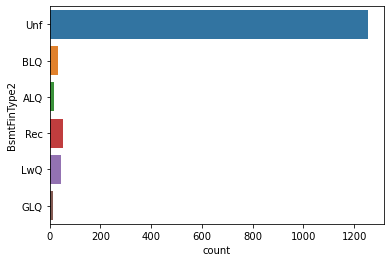

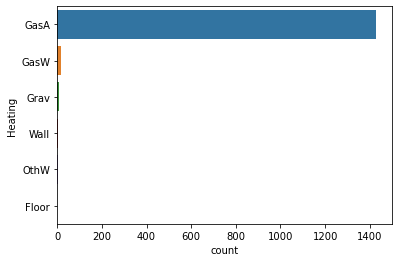

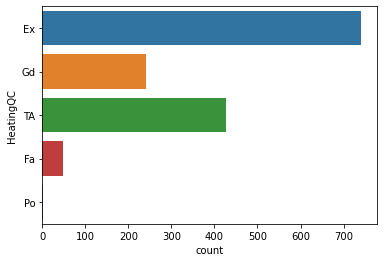

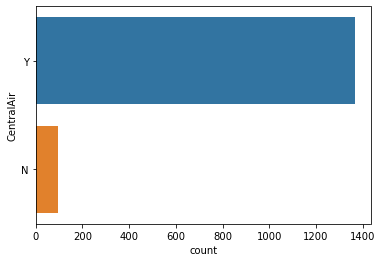

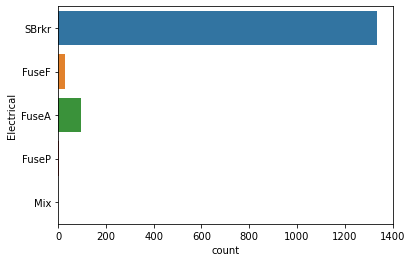

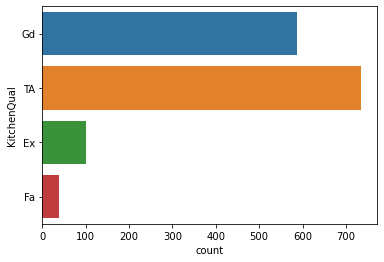

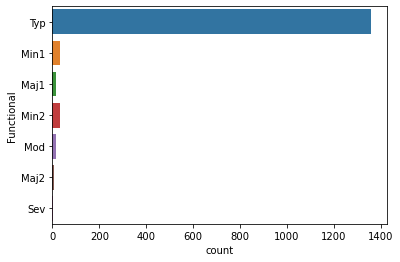

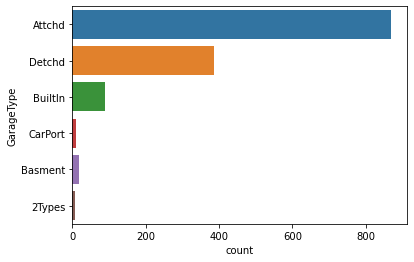

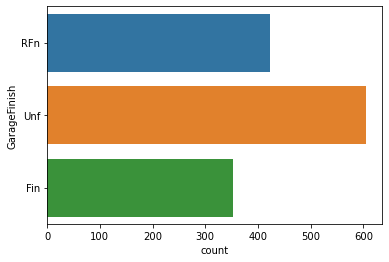

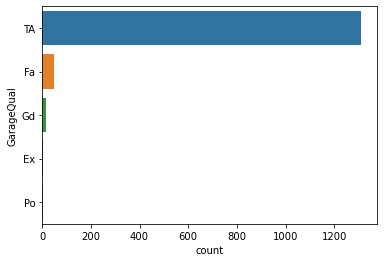

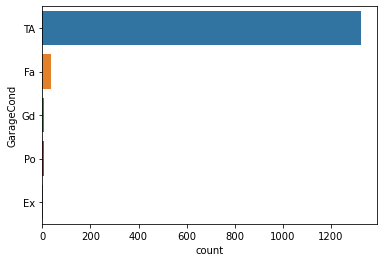

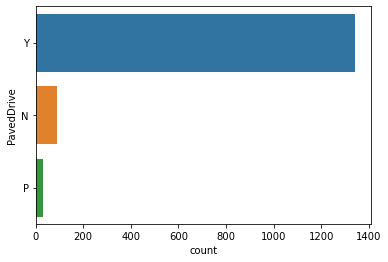

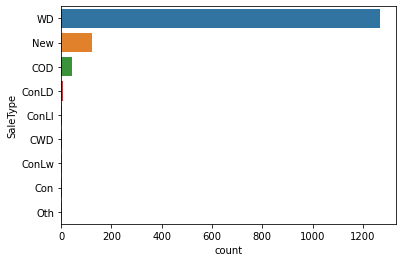

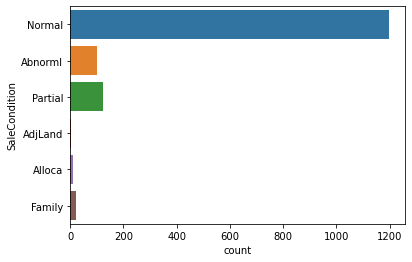

In [381]:

for column in df_original.select_dtypes(include='object'):
    if df_original[column].nunique() < 20:
        sns.countplot(y=column, data=df_original)
        plt.show()

In [382]:
# Remove any columns that aren’t relevant.
#not_required_columns = ["id","Street","Utilities","Condition2","Exterior2nd","ExterQual"]
#df_original.drop(labels = not_required_columns, axis =1, inplace=True)
# RoofMatl

##### visualising the Categorical variable

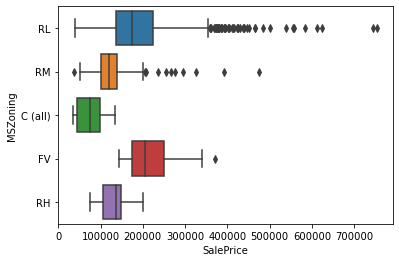

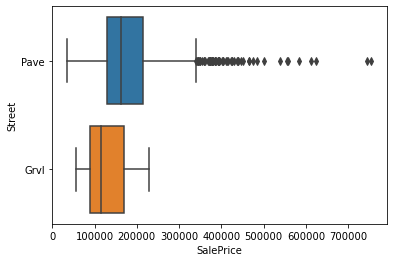

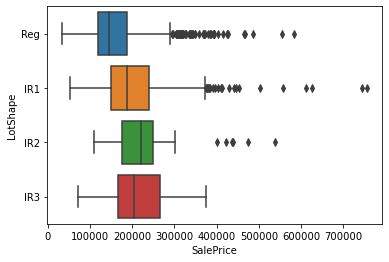

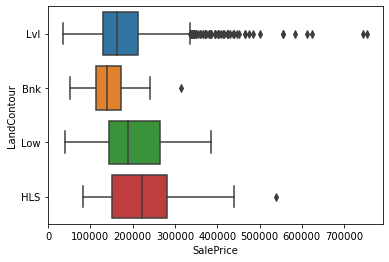

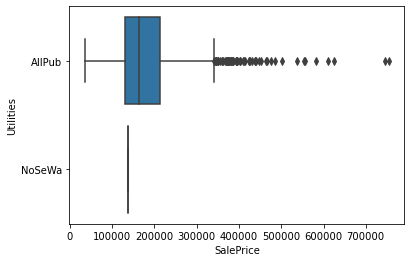

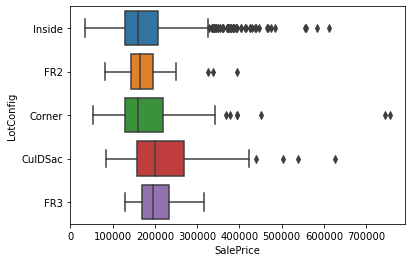

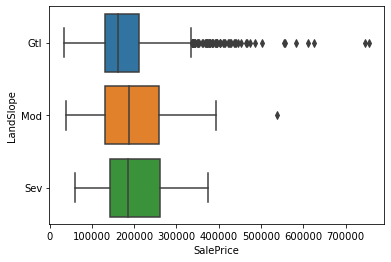

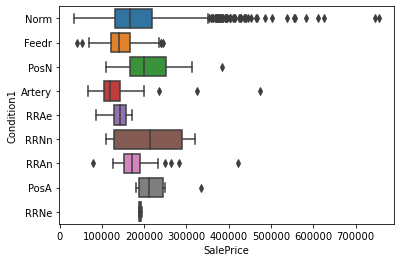

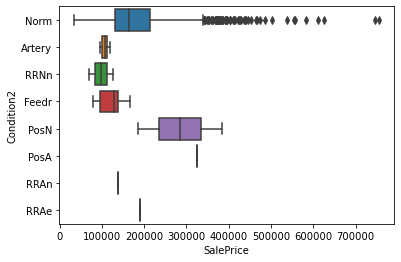

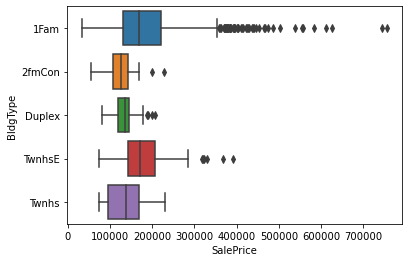

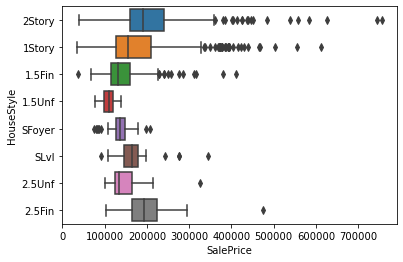

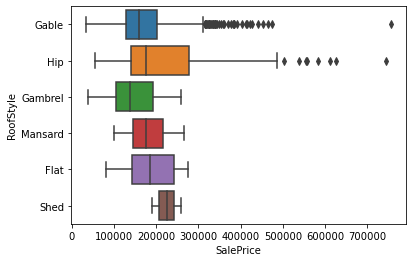

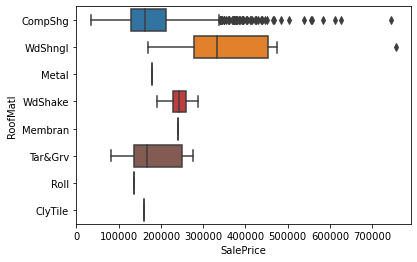

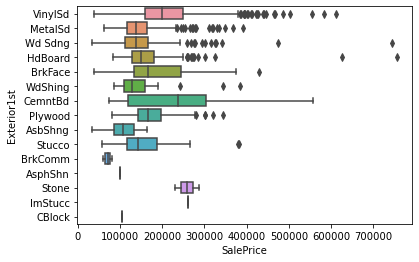

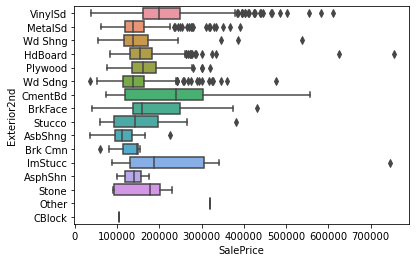

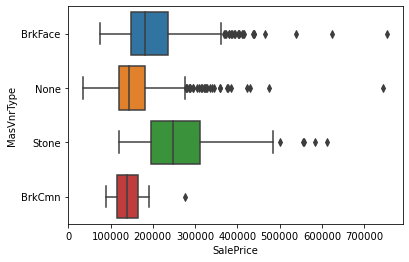

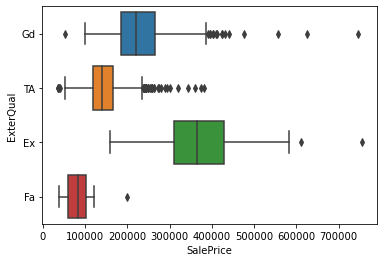

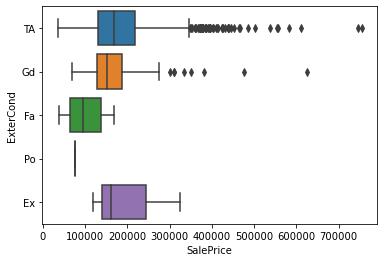

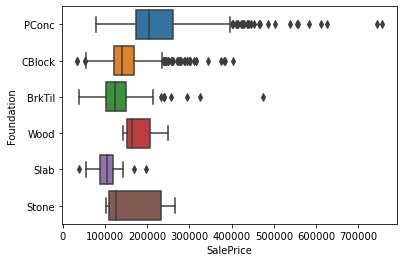

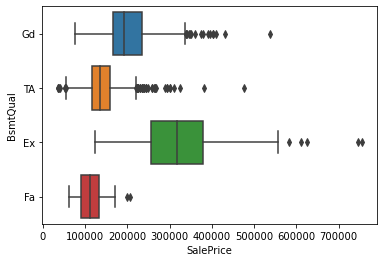

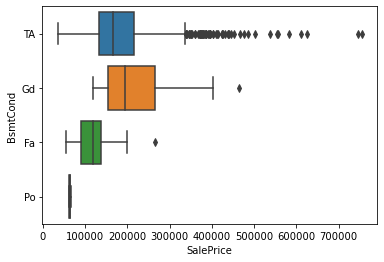

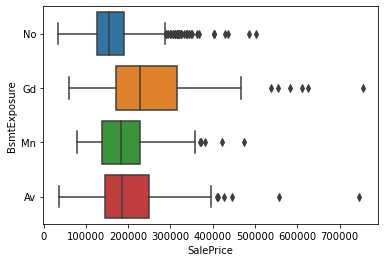

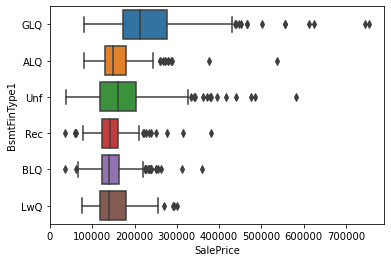

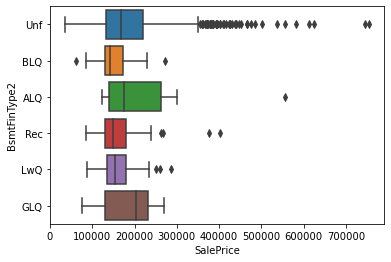

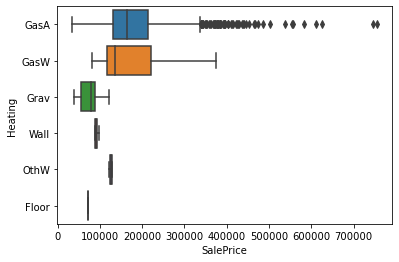

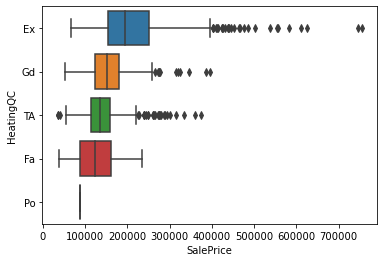

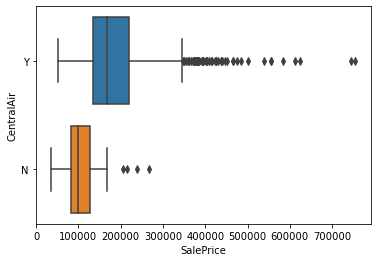

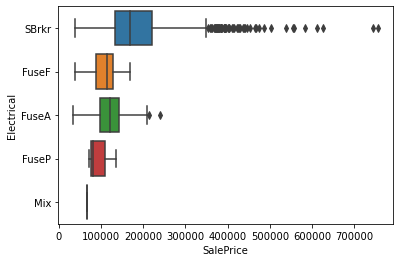

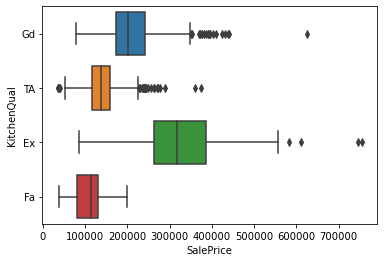

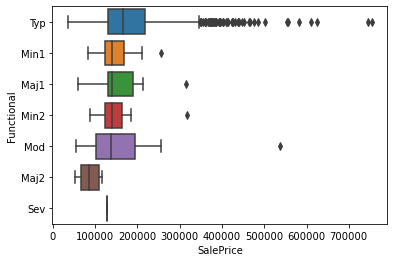

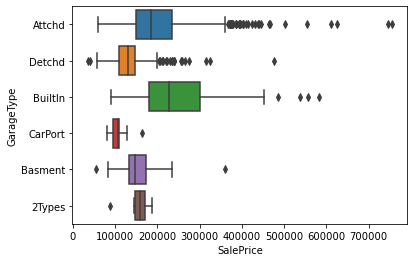

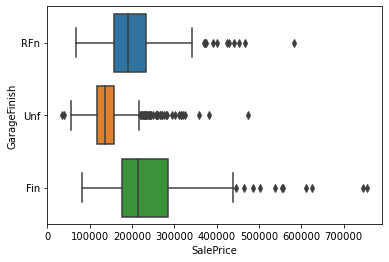

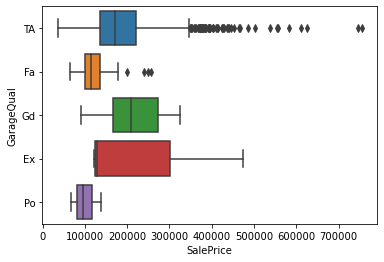

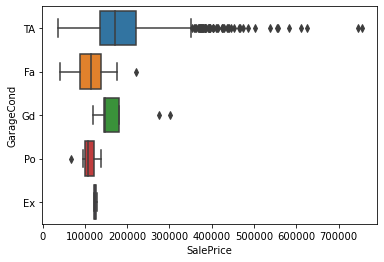

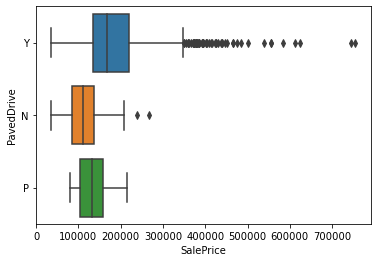

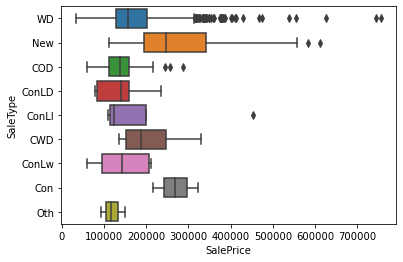

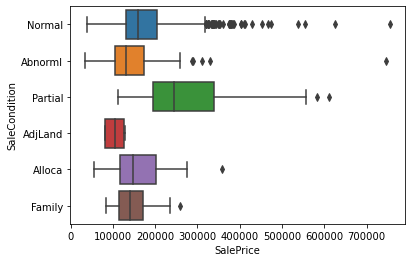

In [383]:

housing = df_original
for column in housing.select_dtypes(include='object'):
    if housing[column].nunique() < 20:
        sns.boxplot(y=column, x='SalePrice', data=housing)
        plt.show()

### Outlier treatment 

In [384]:


Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
housing = housing[~(((housing > (Q3 + 1.5 * IQR))).any(axis=1)) ]
print("-------------------")
print("After Outlier treatment ")
#housing.mask(housing.sub(housing.median()).div(housing.std()).abs().gt(2))
housing.shape

MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64
-------------------
Aft

(584, 75)

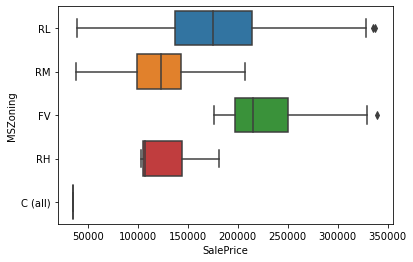

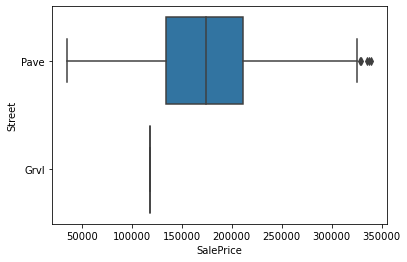

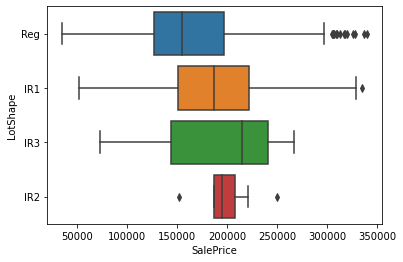

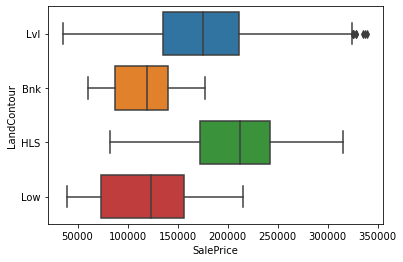

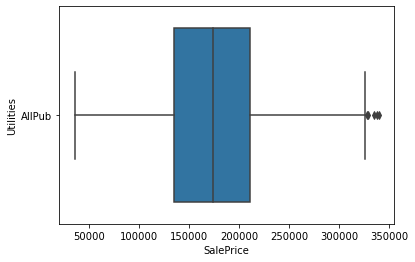

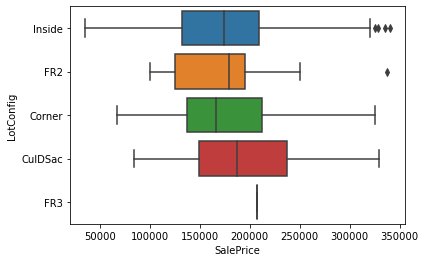

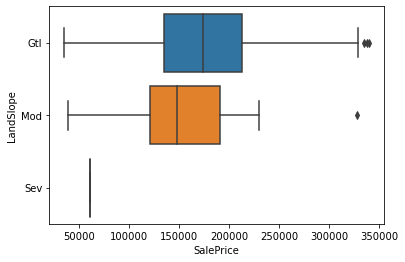

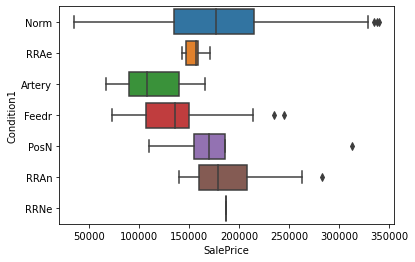

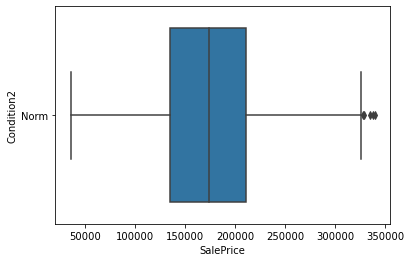

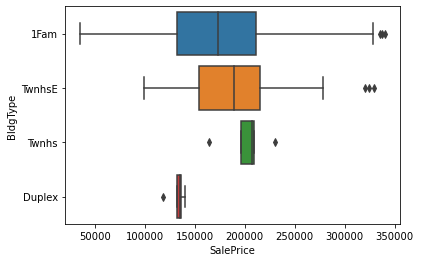

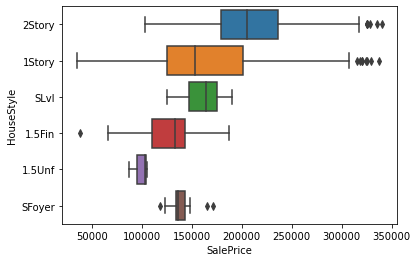

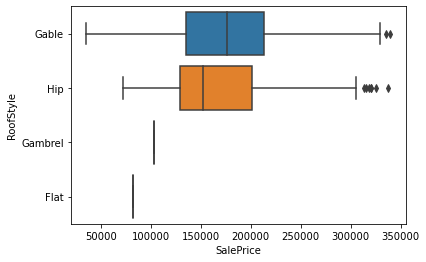

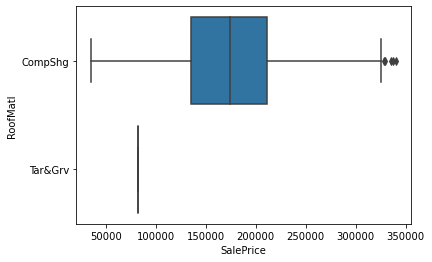

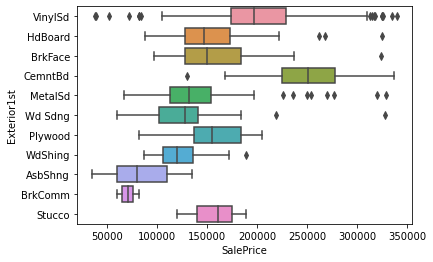

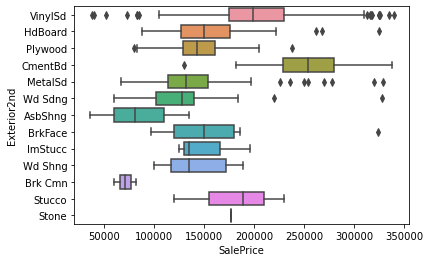

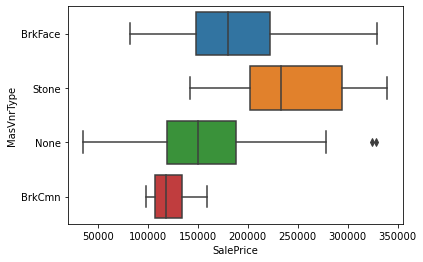

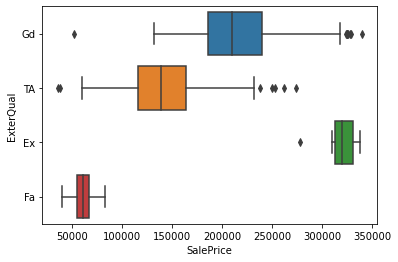

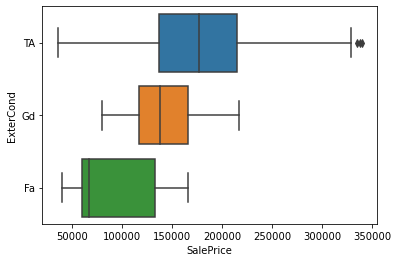

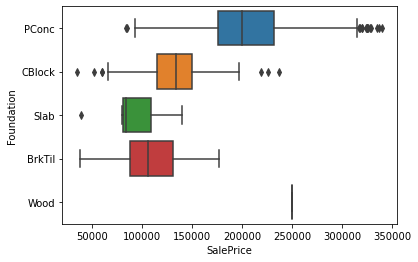

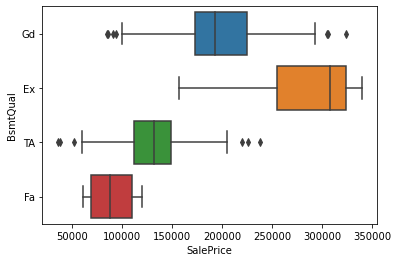

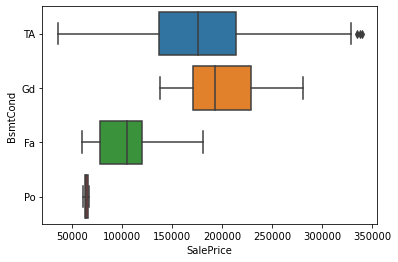

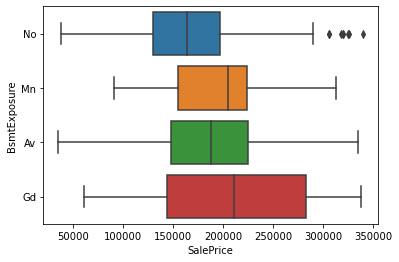

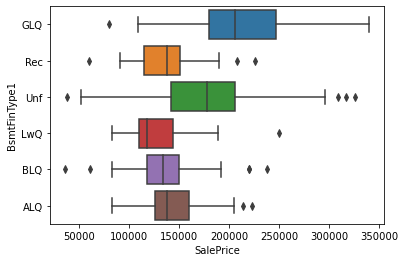

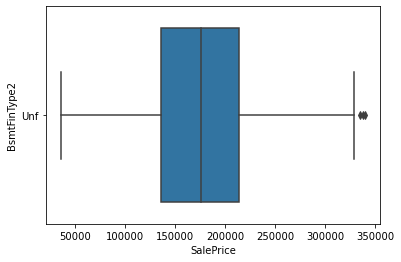

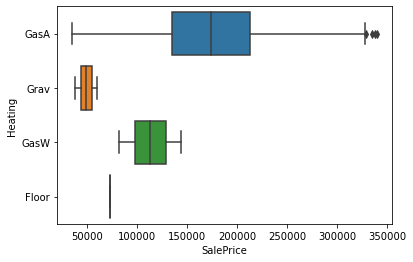

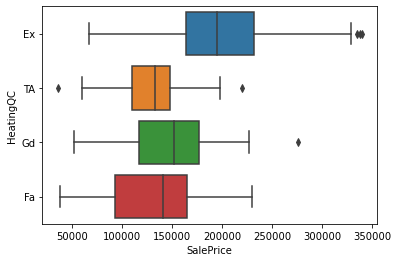

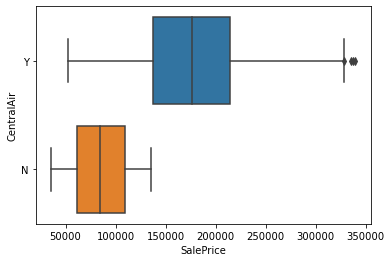

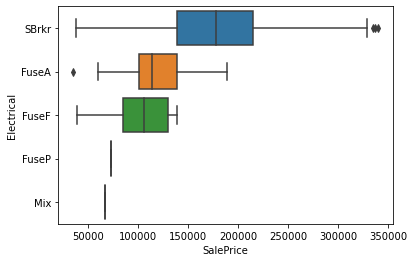

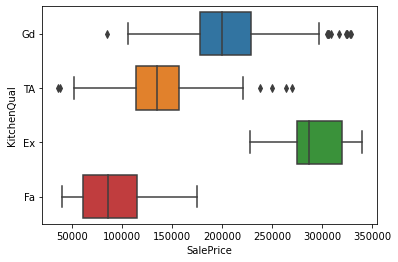

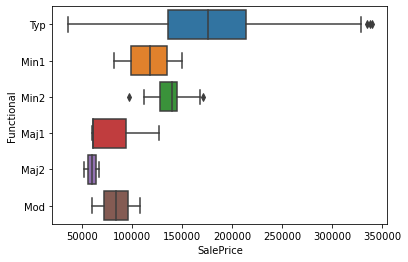

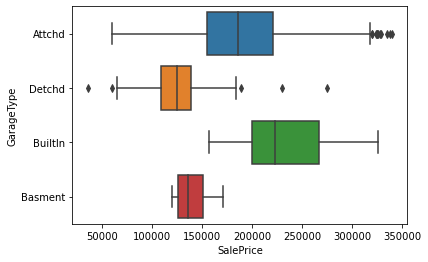

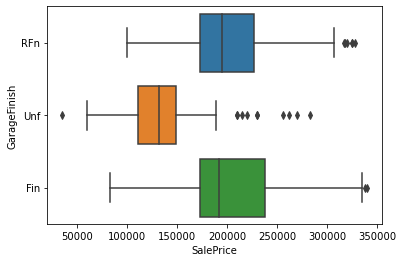

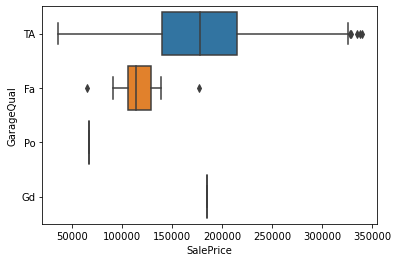

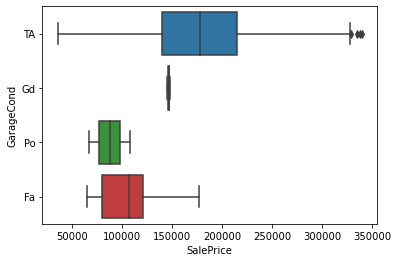

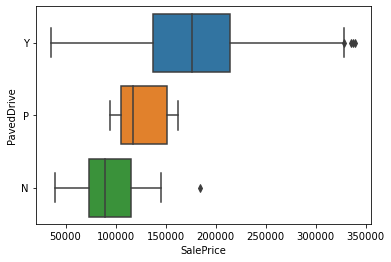

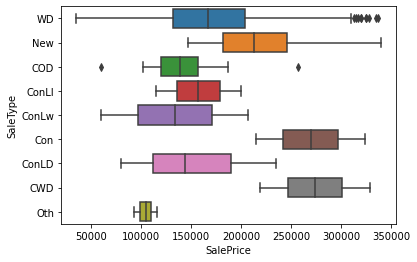

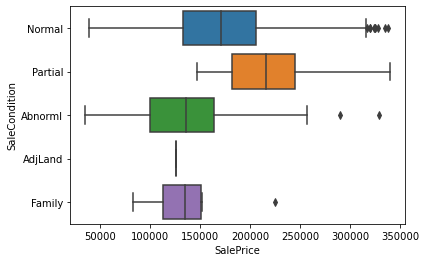

In [385]:
## Lets see the boxplot again 

for column in housing.select_dtypes(include='object'):
    if housing[column].nunique() < 20:
        sns.boxplot(y=column, x='SalePrice', data=housing)
        plt.show()

In [386]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [387]:
# Perform one hot encoding for categorical with no order 

In [388]:
# check the value counts 
df_original['MSSubClass'].value_counts()

MSSubClass = pd.get_dummies(df_original['MSSubClass'], drop_first=True, dtype=int)
MSSubClass.head()

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, MSSubClass], axis=1)
housing = housing.drop('MSSubClass', axis=1)
housing.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,60,70,75,80,85,90,120,160,180,190
0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,1,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,1,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,1,0,0,0,0,0,0,0,0,0


In [389]:
# check the value counts 
df_original['MSZoning'].value_counts()

MSZoning = pd.get_dummies(df_original['MSZoning'], drop_first=True, dtype=int)
MSZoning.head()

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, MSZoning], axis=1)
housing = housing.drop('MSZoning', axis=1)
housing.head()

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,85,90,120,160,180,190,FV,RH,RL,RM
0,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,0,0,0,1,0


In [390]:
# check the value counts 
df_original['Street'].value_counts()

Street = pd.get_dummies(df_original['Street'], drop_first=True, dtype=int)
Street.head()

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, Street], axis=1)
housing = housing.drop('Street', axis=1)
housing.head()

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,90,120,160,180,190,FV,RH,RL,RM,Pave
0,65.0,8450.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,0,0,1,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
2,68.0,11250.0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,0,0,1,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
4,84.0,14260.0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,0,0,1,0,1


In [391]:
# check the value counts 
df_original['LotShape'].value_counts()

LotShape = pd.get_dummies(df_original['LotShape'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, LotShape], axis=1)
housing = housing.drop('LotShape', axis=1)
housing.head()

,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,180,190,FV,RH,RL,RM,Pave,IR2,IR3,Reg
0,65.0,8450.0,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,1
2,68.0,11250.0,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260.0,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,1,0,1,0,0,0


In [392]:
# check the value counts 
df_original['LandContour'].value_counts()

LandContour = pd.get_dummies(df_original['LandContour'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, LandContour], axis=1)
housing = housing.drop('LandContour', axis=1)
housing.head()

,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl
0,65.0,8450.0,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,1,0,0,1,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,1,0,0,1
2,68.0,11250.0,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,1,0,0,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
4,84.0,14260.0,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,0,1,0,1,0,0,0,0,0,1


In [393]:
# check the value counts 
df_original['Utilities'].value_counts()
# its better to drop this 
housing = housing.drop('Utilities', axis=1)

In [394]:
# check the value counts 
df_original['LotConfig'].value_counts()

LotConfig = pd.get_dummies(df_original['LotConfig'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, LotConfig], axis=1)
housing = housing.drop('LotConfig', axis=1)
housing.head()

,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside
0,65.0,8450.0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,...,0,0,1,0,0,1,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,1,0,0
2,68.0,11250.0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,...,0,0,0,0,0,1,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260.0,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,...,0,0,0,0,0,1,0,1,0,0


In [395]:
# check the value counts 
df_original['LandSlope'].value_counts()

LandSlope = pd.get_dummies(df_original['LandSlope'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, LandSlope], axis=1)
housing = housing.drop('LandSlope', axis=1)
housing.head()

,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev
0,65.0,8450.0,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,...,1,0,0,1,0,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,1,0,0,0,0
2,68.0,11250.0,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,...,0,0,0,1,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260.0,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,...,0,0,0,1,0,1,0,0,0,0


In [396]:
# check the value counts 
df_original['Neighborhood'].value_counts()

Neighborhood = pd.get_dummies(df_original['Neighborhood'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, Neighborhood], axis=1)
housing = housing.drop('Neighborhood', axis=1)
housing.head()

,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,65.0,8450.0,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250.0,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260.0,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,...,1,0,0,0,0,0,0,0,0,0


In [397]:
# check the value counts 
df_original['Condition1'].value_counts()

Condition1 = pd.get_dummies(df_original['Condition1'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe

housing = pd.concat([housing, Condition1], axis=1)
housing = housing.drop('Condition1', axis=1)
housing.head()

,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,65.0,8450.0,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,...,0,0,0,1,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,0,0,0,0,0
2,68.0,11250.0,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,...,0,0,0,1,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260.0,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,...,0,0,0,1,0,0,0,0,0,0


In [398]:
# we do not want redumdant column, lets drop Condition2
housing = housing.drop('Condition2', axis=1)

In [399]:
# check the value counts 
df_original['BldgType'].value_counts()
BldgType = pd.get_dummies(df_original['BldgType'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BldgType], axis=1)
housing = housing.drop('BldgType', axis=1)
housing.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE
0,65.0,8450.0,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250.0,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260.0,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0


In [400]:
# check the value counts 
df_original['HouseStyle'].value_counts()
HouseStyle = pd.get_dummies(df_original['HouseStyle'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, HouseStyle], axis=1)
housing = housing.drop('HouseStyle', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [401]:
housing['YearRemodAdd'].value_counts()

2006.0    53
1950.0    51
2007.0    40
2004.0    35
2005.0    33
2000.0    26
2003.0    25
2002.0    24
2008.0    19
1998.0    14
1999.0    13
1995.0    12
2009.0    11
1992.0    11
1996.0    10
1997.0    10
2001.0     9
1977.0     9
1976.0     8
1972.0     8
1954.0     8
1956.0     8
1994.0     8
1959.0     7
1993.0     7
1968.0     6
1970.0     6
1966.0     6
1967.0     6
1971.0     6
1962.0     6
1957.0     6
1958.0     5
1985.0     5
1965.0     5
1990.0     5
1978.0     5
1955.0     4
1960.0     4
1991.0     4
1982.0     4
1984.0     4
1969.0     4
1974.0     3
1963.0     3
1964.0     3
1989.0     3
1980.0     3
1961.0     3
1979.0     3
1952.0     2
1951.0     2
2010.0     2
1953.0     2
1975.0     2
1987.0     1
1981.0     1
1973.0     1
Name: YearRemodAdd, dtype: int64

In [402]:
housing['YearBuilt'].value_counts()

2005.0    41
2006.0    40
2004.0    35
2007.0    32
2003.0    27
          ..
1922.0     1
1923.0     1
1929.0     1
1942.0     1
1916.0     1
Name: YearBuilt, Length: 83, dtype: int64

In [403]:
# derieved data
housing['isRemod'] = np.where( housing['YearBuilt'] == housing['YearRemodAdd'] , 0, 1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,isRemod
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,1,0,0,0


In [404]:
housing = housing.drop('YearRemodAdd', axis=1)

In [405]:
# check the value counts 
df_original['RoofStyle'].value_counts()
RoofStyle = pd.get_dummies(df_original['RoofStyle'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, RoofStyle], axis=1)
housing = housing.drop('RoofStyle', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,2.5Unf,2Story,SFoyer,SLvl,isRemod,Gable,Gambrel,Hip,Mansard,Shed
0,65.0,8450.0,7.0,5.0,2003.0,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,1,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,0,1,0,0,1,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,1,1,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,0,1,0,0,0,1,0,0,0,0


In [406]:
# check the value counts 
df_original['RoofMatl'].value_counts()
RoofMatl = pd.get_dummies(df_original['RoofMatl'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, RoofMatl], axis=1)
housing = housing.drop('RoofMatl', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
0,65.0,8450.0,7.0,5.0,2003.0,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,0,0,1,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,VinylSd,VinylSd,BrkFace,162.0,Gd,...,0,0,0,1,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,VinylSd,VinylSd,BrkFace,350.0,Gd,...,0,0,0,1,0,0,0,0,0,0


In [407]:
# check the value counts 
df_original['Exterior2nd'].value_counts()
Exterior2nd = pd.get_dummies(df_original['Exterior2nd'], drop_first=True, dtype=int)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, Exterior2nd], axis=1)
housing = housing.drop('Exterior2nd', axis=1)

# remove unnecessary redundant data
housing = housing.drop('Exterior1st', axis=1)

housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
0,65.0,8450.0,7.0,5.0,2003.0,BrkFace,196.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,BrkFace,162.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260.0,8.0,5.0,2000.0,BrkFace,350.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0


In [408]:
# check the value counts 
df_original['MasVnrType'].value_counts()
MasVnrType = pd.get_dummies(df_original['MasVnrType'], dtype=int)
#MasVnrType['MasVnrType_None'] = MasVnrType['None']
MasVnrType['MasVnrType_BrkFace'] = MasVnrType['BrkFace']
MasVnrType['MasVnrType_Stone'] = MasVnrType['Stone']
MasVnrType['MasVnrType_BrkCmn'] = MasVnrType['BrkCmn']

MasVnrType = MasVnrType.drop(['None','BrkFace','Stone','BrkCmn'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, MasVnrType], axis=1)
housing = housing.drop('MasVnrType', axis=1)
#housing = housing.drop('None', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_BrkCmn
0,65.0,8450.0,7.0,5.0,2003.0,196.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,Gd,TA,PConc,Gd,...,0,0,0,0,1,0,0,1,0,0


In [409]:
# check the value counts 
df_original['ExterQual'].value_counts()
ExterQual = pd.get_dummies(df_original['ExterQual'], dtype=int)
ExterQual['ExterQual_Ex'] = ExterQual['Ex']
ExterQual['ExterQual_Gd'] = ExterQual['Gd']
ExterQual['ExterQual_TA'] = ExterQual['TA']
#ExterQual['ExterQual_Fa'] = ExterQual['Fa']
#BsmtQual['BsmtQual_Po'] = BsmtQual['Po']
ExterQual = ExterQual.drop(['Ex','Gd','TA','Fa'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, ExterQual], axis=1)
housing = housing.drop('ExterQual', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,...,Stucco,VinylSd,Wd Sdng,Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_BrkCmn,ExterQual_Ex,ExterQual_Gd,ExterQual_TA
0,65.0,8450.0,7.0,5.0,2003.0,196.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250.0,7.0,5.0,2001.0,162.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
4,84.0,14260.0,8.0,5.0,2000.0,350.0,TA,PConc,Gd,TA,...,0,1,0,0,1,0,0,0,1,0


In [410]:
# check the value counts 
df_original['ExterCond'].value_counts()
ExterCond = pd.get_dummies(df_original['ExterCond'], dtype=int)
ExterCond['ExterCond_Ex'] = ExterCond['Ex']
ExterCond['ExterCond_Gd'] = ExterCond['Gd']
ExterCond['ExterCond_TA'] = ExterCond['TA']
ExterCond['ExterCond_Fa'] = ExterCond['Fa']
#BsmtQual['BsmtQual_Po'] = BsmtQual['Po']
ExterCond = ExterCond.drop(['Ex','Gd','TA','Fa','Po'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, ExterCond], axis=1)
housing = housing.drop('ExterCond', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,...,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_BrkCmn,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Gd,ExterCond_TA,ExterCond_Fa
0,65.0,8450.0,7.0,5.0,2003.0,196.0,PConc,Gd,TA,No,...,1,0,0,0,1,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,PConc,Gd,TA,Mn,...,1,0,0,0,1,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,PConc,Gd,TA,Av,...,1,0,0,0,1,0,0,0,1,0


In [411]:
# check the value counts 
df_original['Foundation'].value_counts()
Foundation = pd.get_dummies(df_original['Foundation'], dtype=int)
Foundation['Foundation_BrkTil'] = Foundation['BrkTil']
Foundation['Foundation_CBlock'] = Foundation['CBlock']
Foundation['Foundation_PConc'] = Foundation['PConc']
Foundation['Foundation_Slab'] = Foundation['Slab']
Foundation['Foundation_Stone'] = Foundation['Stone']

Foundation = Foundation.drop(['BrkTil','CBlock','PConc','Slab','Stone','Wood'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, Foundation], axis=1)
housing = housing.drop('Foundation', axis=1)
#housing = housing.drop('Wood', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,ExterQual_TA,ExterCond_Ex,ExterCond_Gd,ExterCond_TA,ExterCond_Fa,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone
0,65.0,8450.0,7.0,5.0,2003.0,196.0,Gd,TA,No,GLQ,...,0,0,0,1,0,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,Gd,TA,Mn,GLQ,...,0,0,0,1,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,1,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,Gd,TA,Av,GLQ,...,0,0,0,1,0,0,0,1,0,0


In [412]:
print(df_original['BsmtQual'].value_counts())
BsmtQual = pd.get_dummies(df_original['BsmtQual'], dtype=int)
#BsmtQual = BsmtQual.drop('NA', axis=1)
BsmtQual['BsmtQual_Ex'] = BsmtQual['Ex']
BsmtQual['BsmtQual_Gd'] = BsmtQual['Gd']
BsmtQual['BsmtQual_TA'] = BsmtQual['TA']
#BsmtQual['BsmtQual_Fa'] = BsmtQual['Fa']
#BsmtQual['BsmtQual_Po'] = BsmtQual['Po']
BsmtQual = BsmtQual.drop(['Ex','Gd','TA','Fa'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BsmtQual], axis=1)
housing = housing.drop('BsmtQual', axis=1)
housing.head()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,ExterCond_TA,ExterCond_Fa,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA
0,65.0,8450.0,7.0,5.0,2003.0,196.0,TA,No,GLQ,706.0,...,1,0,0,0,1,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,TA,Mn,GLQ,486.0,...,1,0,0,0,1,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,0,0,1
4,84.0,14260.0,8.0,5.0,2000.0,350.0,TA,Av,GLQ,655.0,...,1,0,0,0,1,0,0,0,1,0


In [413]:
df_original['BsmtCond'].value_counts()

BsmtCond = pd.get_dummies(df_original['BsmtCond'], dtype=int)
#BsmtQual = BsmtQual.drop('NA', axis=1)
#BsmtCond['BsmtCond_Ex'] = BsmtCond['Ex']
BsmtCond['BsmtCond_Gd'] = BsmtCond['Gd']
BsmtCond['BsmtCond_TA'] = BsmtCond['TA']
BsmtCond['BsmtCond_Fa'] = BsmtCond['Fa']
#BsmtCond['BsmtCond_Po'] = BsmtCond['Po']
#BsmtCond
BsmtCond = BsmtCond.drop(['Po','Gd','TA','Fa'], axis=1)
# # now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BsmtCond], axis=1)
housing = housing.drop('BsmtCond', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtCond_Fa
0,65.0,8450.0,7.0,5.0,2003.0,196.0,No,GLQ,706.0,Unf,...,0,1,0,0,0,1,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,1,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,Mn,GLQ,486.0,Unf,...,0,1,0,0,0,1,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,1,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,Av,GLQ,655.0,Unf,...,0,1,0,0,0,1,0,0,1,0


In [414]:
df_original['BsmtExposure'].value_counts()

BsmtExposure = pd.get_dummies(df_original['BsmtExposure'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
#BsmtCond['BsmtCond_Ex'] = BsmtCond['Ex']
BsmtExposure['BsmtExposure_No'] = BsmtExposure['No']
BsmtExposure['BsmtExposure_Av'] = BsmtExposure['Av']
BsmtExposure['BsmtExposure_Gd'] = BsmtExposure['Gd']
#BsmtCond['BsmtCond_Po'] = BsmtCond['Po']
#BsmtCond
BsmtExposure = BsmtExposure.drop(['No','Av','Gd','Mn'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BsmtExposure], axis=1)
housing = housing.drop('BsmtExposure', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtCond_Fa,BsmtExposure_No,BsmtExposure_Av,BsmtExposure_Gd
0,65.0,8450.0,7.0,5.0,2003.0,196.0,GLQ,706.0,Unf,0.0,...,0,0,1,0,0,1,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,1
2,68.0,11250.0,7.0,5.0,2001.0,162.0,GLQ,486.0,Unf,0.0,...,0,0,1,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,1,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,GLQ,655.0,Unf,0.0,...,0,0,1,0,0,1,0,0,1,0


In [415]:
df_original['BsmtFinType1'].value_counts()

BsmtFinType1 = pd.get_dummies(df_original['BsmtFinType1'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
BsmtFinType1['BsmtFinType1_Unf'] = BsmtFinType1['Unf']
BsmtFinType1['BsmtFinType1_GLQ'] = BsmtFinType1['GLQ']
BsmtFinType1['BsmtFinType1_ALQ'] = BsmtFinType1['ALQ']
BsmtFinType1['BsmtFinType1_BLQ'] = BsmtFinType1['BLQ']
BsmtFinType1['BsmtFinType1_Rec'] = BsmtFinType1['Rec']
#BsmtFinType1
BsmtFinType1 = BsmtFinType1.drop(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BsmtFinType1], axis=1)
housing = housing.drop('BsmtFinType1', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,BsmtCond_TA,BsmtCond_Fa,BsmtExposure_No,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_Rec
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,Unf,0.0,150.0,...,1,0,1,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,1,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,Unf,0.0,434.0,...,1,0,0,0,0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,Unf,0.0,490.0,...,1,0,0,1,0,0,1,0,0,0


In [416]:
df_original['BsmtFinType2'].value_counts()

BsmtFinType2 = pd.get_dummies(df_original['BsmtFinType2'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
BsmtFinType2['BsmtFinType2_Unf'] = BsmtFinType2['Unf']
BsmtFinType2['BsmtFinType2_GLQ'] = BsmtFinType2['GLQ']
BsmtFinType2['BsmtFinType2_ALQ'] = BsmtFinType2['ALQ']
BsmtFinType2['BsmtFinType2_BLQ'] = BsmtFinType2['BLQ']
BsmtFinType2['BsmtFinType2_Rec'] = BsmtFinType2['Rec']
#BsmtFinType1
BsmtFinType2 = BsmtFinType2.drop(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, BsmtFinType2], axis=1)
housing = housing.drop('BsmtFinType2', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_Rec,BsmtFinType2_Unf,BsmtFinType2_GLQ,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_Rec
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,1,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,1,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,1,0,0,0,1,0,0,0,0


In [417]:
df_original['Heating'].value_counts()

Heating = pd.get_dummies(df_original['Heating'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
Heating['Heating_GasA'] = Heating['GasA']
Heating['Heating_GasW'] = Heating['GasW']
Heating['Heating_Grav'] = Heating['Grav']
Heating['Heating_Wall'] = Heating['Wall']
Heating['Heating_OthW'] = Heating['OthW']
#BsmtFinType1
Heating = Heating.drop(['GasA','GasW','Grav','Wall','OthW','Floor'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, Heating], axis=1)
housing = housing.drop('Heating', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtFinType2_Unf,BsmtFinType2_GLQ,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_Rec,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,1,0,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,1,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,1,0,0,0,0,1,0,0,0,0


In [418]:
df_original['HeatingQC'].value_counts()

HeatingQC = pd.get_dummies(df_original['HeatingQC'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
HeatingQC['HeatingQC_Ex'] = HeatingQC['Ex']
HeatingQC['HeatingQC_TA'] = HeatingQC['TA']
HeatingQC['HeatingQC_Gd'] = HeatingQC['Gd']
HeatingQC['HeatingQC_Fa'] = HeatingQC['Fa']
#HeatingQC['HeatingQC_OthW'] = HeatingQC['OthW']
#BsmtFinType1
HeatingQC = HeatingQC.drop(['Ex','TA','Gd','Fa','Po'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, HeatingQC], axis=1)
housing = housing.drop('HeatingQC', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtFinType2_Rec,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,1,0,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,1,0,0,0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,1,0,0,0,0,1,0,0,0


In [419]:
df_original['CentralAir'].value_counts()
var1 = ['CentralAir']
housing[var1] = housing[var1].apply(lambda x: x.map({'Y':1, 'N':0}))
housing.head()
# housing['CentralAir'].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtFinType2_Rec,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,1,0,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,1,0,0,0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,1,0,0,0,0,1,0,0,0


In [420]:
df_original['Electrical'].value_counts()

Electrical = pd.get_dummies(df_original['Electrical'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
Electrical['Electrical_SBrkr'] = Electrical['SBrkr']
Electrical['Electrical_FuseA'] = Electrical['FuseA']
Electrical['Electrical_FuseF'] = Electrical['FuseF']
Electrical['Electrical_FuseP'] = Electrical['FuseP']
#HeatingQC['HeatingQC_OthW'] = HeatingQC['OthW']
#BsmtFinType1
Electrical = Electrical.drop(['SBrkr','FuseA','FuseF','FuseP','Mix'], axis=1)
# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, Electrical], axis=1)
housing = housing.drop('Electrical', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_Wall,Heating_OthW,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,1,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,0,0,1,0,0,0


In [421]:
df_original['KitchenQual'].value_counts()

KitchenQual = pd.get_dummies(df_original['KitchenQual'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
KitchenQual['KitchenQual_TA'] = KitchenQual['TA']
KitchenQual['KitchenQual_Gd'] = KitchenQual['Gd']
KitchenQual['KitchenQual_Ex'] = KitchenQual['Ex']
#KitchenQual['KitchenQual_Fa'] = KitchenQual['Fa']

KitchenQual = KitchenQual.drop(['TA','Gd','Ex','Fa'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, KitchenQual], axis=1)
housing = housing.drop('KitchenQual', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Fa,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


In [422]:
df_original['Functional'].value_counts()

Functional = pd.get_dummies(df_original['Functional'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
Functional['Functional_Typ']  = Functional['Typ']
Functional['Functional_Min2'] = Functional['Min2']
Functional['Functional_Min1'] = Functional['Min1']
Functional['Functional_Mod']  = Functional['Mod']
Functional['Functional_Maj1'] = Functional['Maj1']
Functional['Functional_Maj2'] = Functional['Maj2']

Functional = Functional.drop(['Typ','Min2','Min1','Mod','Maj1','Maj2','Sev'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, Functional], axis=1)
housing = housing.drop('Functional', axis=1)
housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,1,0,1,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,1,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,1,0,0,0,0,0


In [423]:
df_original['GarageType'].value_counts()

GarageType = pd.get_dummies(df_original['GarageType'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
GarageType['GarageType_Attchd']  = GarageType['Attchd']
GarageType['GarageType_Detchd']  = GarageType['Detchd']
GarageType['GarageType_BuiltIn'] = GarageType['BuiltIn']
GarageType['GarageType_Basment'] = GarageType['Basment']
GarageType['GarageType_CarPort'] = GarageType['CarPort']

GarageType = GarageType.drop(['Attchd','Detchd','BuiltIn','Basment','CarPort','2Types'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, GarageType], axis=1)
housing = housing.drop('GarageType', axis=1)
housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_CarPort
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,1,0,0,0,0


In [424]:
df_original['GarageFinish'].value_counts()

GarageFinish = pd.get_dummies(df_original['GarageFinish'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
GarageFinish['GarageFinish_Unf']  = GarageFinish['Unf']
GarageFinish['GarageFinish_RFn']  = GarageFinish['RFn']

GarageFinish = GarageFinish.drop(['Unf','RFn','Fin'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, GarageFinish], axis=1)
housing = housing.drop('GarageFinish', axis=1)
housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional_Mod,Functional_Maj1,Functional_Maj2,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf,GarageFinish_RFn
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,0,1


In [425]:
df_original['GarageQual'].value_counts()

GarageQual = pd.get_dummies(df_original['GarageQual'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
GarageQual['GarageQual_TA'] = GarageQual['TA']
GarageQual['GarageQual_Fa'] = GarageQual['Fa']
GarageQual['GarageQual_Gd'] = GarageQual['Gd']
GarageQual['GarageQual_Ex'] = GarageQual['Ex']

GarageQual = GarageQual.drop(['TA','Fa','Gd','Po','Ex'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, GarageQual], axis=1)
housing = housing.drop('GarageQual', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType_Detchd,GarageType_BuiltIn,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf,GarageFinish_RFn,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,1,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,1,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,1,1,0,0,0


In [426]:
df_original['GarageCond'].value_counts()

GarageCond = pd.get_dummies(df_original['GarageCond'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
GarageCond['GarageCond_TA'] = GarageCond['TA']
GarageCond['GarageCond_Fa'] = GarageCond['Fa']
GarageCond['GarageCond_Gd'] = GarageCond['Gd']
GarageCond['GarageCond_Po'] = GarageCond['Po']

GarageCond = GarageCond.drop(['TA','Fa','Gd','Po','Ex'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, GarageCond], axis=1)
housing = housing.drop('GarageCond', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_Unf,GarageFinish_RFn,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex,GarageCond_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,1,1,0,0,0,1,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,0,0,1,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,1,1,0,0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,1,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,1,1,0,0,0,1,0,0,0


In [427]:
df_original['PavedDrive'].value_counts()

PavedDrive = pd.get_dummies(df_original['PavedDrive'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
PavedDrive['PavedDrive_Y']  = PavedDrive['Y']
PavedDrive['PavedDrive_P']  = PavedDrive['P']

PavedDrive = PavedDrive.drop(['Y','P','N'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, PavedDrive], axis=1)
housing = housing.drop('PavedDrive', axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex,GarageCond_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_Y,PavedDrive_P
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,1,0,0,0,1,0,0,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,1,0,0,0,1,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,1,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,1,0,0,0,1,0,0,0,1,0


In [428]:
df_original['SaleType'].value_counts()

SaleType = pd.get_dummies(df_original['SaleType'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
SaleType['SaleType_WD'] = SaleType['WD']
SaleType['SaleType_New'] = SaleType['New']
SaleType['SaleType_COD'] = SaleType['COD']
SaleType['SaleType_ConLD'] = SaleType['ConLD']
SaleType['SaleType_ConLI'] = SaleType['ConLI']
SaleType['SaleType_ConLw'] = SaleType['ConLw']
SaleType['SaleType_CWD'] = SaleType['CWD']
SaleType['SaleType_Oth'] = SaleType['Oth']

SaleType = SaleType.drop(['WD','New','COD','ConLD','ConLI','ConLw','CWD','Oth','Con'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, SaleType], axis=1)
housing = housing.drop('SaleType', axis=1)
housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,PavedDrive_P,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_CWD,SaleType_Oth
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,1,0,1,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,1,0,1,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,0,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,1,0,1,0,0,0,0,0,0,0


In [429]:
df_original['SaleCondition'].value_counts()

SaleCondition = pd.get_dummies(df_original['SaleCondition'], dtype=int)
#BsmtExposure = BsmtExposure.drop('Mn', axis=1)
SaleCondition['SaleCondition_Normal'] = SaleCondition['Normal']
SaleCondition['SaleCondition_Partial'] = SaleCondition['Partial']
SaleCondition['SaleCondition_Abnorml'] = SaleCondition['Abnorml']
SaleCondition['SaleCondition_Family'] = SaleCondition['Family']
SaleCondition['SaleCondition_Alloca'] = SaleCondition['Alloca']

SaleCondition = SaleCondition.drop(['Normal','Partial','Abnorml','Family','Alloca','AdjLand'], axis=1)

# now we will concat the dummy var with  main dataframe
housing = pd.concat([housing, SaleCondition], axis=1)
housing = housing.drop('SaleCondition', axis=1)
housing.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_CWD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca
0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,1,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,1,0,0,0,0


In [430]:
housing.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 224 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    LotFrontage            472 non-null    float64
 1    LotArea                584 non-null    float64
 2    OverallQual            584 non-null    float64
 3    OverallCond            584 non-null    float64
 4    YearBuilt              584 non-null    float64
 5    MasVnrArea             579 non-null    float64
 6    BsmtFinSF1             584 non-null    float64
 7    BsmtFinSF2             584 non-null    float64
 8    BsmtUnfSF              584 non-null    float64
 9    TotalBsmtSF            584 non-null    float64
 10   CentralAir             584 non-null    float64
 11   1stFlrSF               584 non-null    float64
 12   2ndFlrSF               584 non-null    float64
 13   LowQualFinSF           584 non-null    float64
 14   GrLivArea              584 non-null   

In [431]:
# Adding up the missing values (column-wise)
housing.isnull().sum().sort_values(ascending=False)

LotFrontage             988
GarageYrBlt             904
MasVnrArea              881
EnclosedPorch           876
TotRmsAbvGrd            876
                       ... 
2fmCon                    0
Duplex                    0
Twnhs                     0
TwnhsE                    0
SaleCondition_Alloca      0
Length: 224, dtype: int64

In [432]:
#### *** We can see from above there are only 3 columns with null values still
## Before we start with missing value imputaion lets split that data into Train and Test.
housing['LotFrontage'] = housing['LotFrontage'].apply(lambda x: 0 if pd.isna(x) else x )
housing.isnull().sum().sort_values(ascending=False)

##  its better to drop other rows with null values 
##  We will still have enough rows in train data
housing = housing.dropna(how='any',axis=0) 
housing.shape

(551, 224)

In [433]:
### Train and Test Split ####

In [434]:
# Putting feature variable to X
X = housing.drop(['SalePrice'],axis=1)

# Putting response variable to y
y = housing['SalePrice']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [435]:
# checking
# Adding up the missing values (column-wise)
X_train.isnull().sum().sort_values(ascending=False)

LotFrontage             0
BsmtQual_Gd             0
ExterQual_TA            0
ExterCond_Ex            0
ExterCond_Gd            0
                       ..
NPkVill                 0
NWAmes                  0
NoRidge                 0
NridgHt                 0
SaleCondition_Alloca    0
Length: 223, dtype: int64

In [436]:
X_train.shape

(385, 223)

Coef shape for Ridge :  (100, 223)
Ridge : Plot and check


Text(0, 0.5, 'weights')

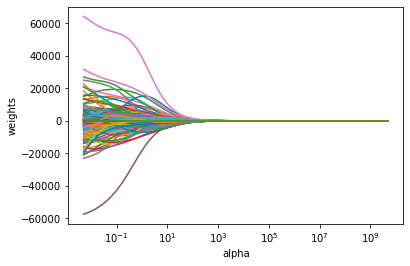

In [437]:
# Ridge Regression 
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
print("Coef shape for Ridge : ",np.shape(coefs))

print("Ridge : Plot and check")
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [438]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("Alpha for Ridge :",ridgecv.alpha_)

Alpha for Ridge : 0.18824679033962358


In [439]:
ridge_mod = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_mod.fit(X_train, y_train)

## lets see the prediction 
print("Mean squared Error :", mean_squared_error(y_test, ridge_mod.predict(X_test)))


Mean squared Error : 319151031.87847525


In [440]:
#  examine the coefficient estimates.
pd.Series(ridge_mod.coef_, index = X_train.columns)

LotFrontage                43.863768
LotArea                     0.749578
OverallQual              4228.879661
OverallCond              4578.790486
YearBuilt                 116.180735
                            ...     
SaleCondition_Normal     -892.752271
SaleCondition_Partial    1986.319747
SaleCondition_Abnorml   -3286.353416
SaleCondition_Family     2786.568608
SaleCondition_Alloca        0.000000
Length: 223, dtype: float64

Text(0, 0.5, 'weights')

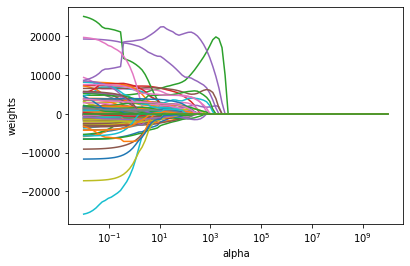

In [441]:
# LAsso Regression 
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [442]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print("Lasso Alpha:",lassocv.alpha_)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)) )

# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)
lasso_data = X_train.iloc[:,lasso.coef_!=0]
print("Shape of the data for lasso", lasso_data.shape)

Lasso Alpha: 22.307589794850845
305512777.56344336
Shape of the data for lasso (385, 84)


In [443]:
# Scalling the Training set only

scaler = MinMaxScaler()

X_train[list(X.columns)] = scaler.fit_transform(X_train[list(X.columns)])

In [444]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_CWD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.0,385.000000,385.000000,...,385.000000,385.000000,385.0,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.0
mean,0.522198,0.437802,0.526299,0.669091,0.736167,0.185254,0.267241,0.0,0.386536,0.532140,...,0.005195,0.002597,0.0,0.002597,0.002597,0.805195,0.109091,0.070130,0.012987,0.0
std,0.272924,0.188310,0.155984,0.154466,0.251716,0.261678,0.259760,0.0,0.266863,0.159158,...,0.071981,0.050965,0.0,0.050965,0.050965,0.396566,0.312159,0.255698,0.113365,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.444444,0.330524,0.375000,0.600000,0.535354,0.000000,0.000000,0.0,0.166467,0.432000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.601852,0.419969,0.500000,0.600000,0.858586,0.000000,0.258456,0.0,0.335329,0.505000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.703704,0.537824,0.625000,0.800000,0.949495,0.354217,0.467773,0.0,0.560479,0.642000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [445]:
# Train data is ready for further action 

In [446]:
##  Using RFE to select top 25 columns 

logreg = LogisticRegression()

rfe = RFE(logreg, 25)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False  True False False False False  True False False False
 False False False  True False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False  True False
 False False False False  True False False False False  True False False
 False False  True  True False  True  True False Fa

In [447]:
X.columns[rfe.support_]

Index(['BsmtFullBath', 'HalfBath', 'YrSold', 'RL', 'Reg', 'Inside', 'CollgCr',
       '1Story', 'isRemod', 'Gable', 'VinylSd', 'MasVnrType_BrkFace',
       'ExterQual_TA', 'Foundation_CBlock', 'BsmtQual_Gd', 'BsmtExposure_No',
       'BsmtExposure_Av', 'BsmtFinType1_Unf', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Gd', 'GarageType_Attchd',
       'GarageFinish_Unf', 'GarageFinish_RFn', 'SaleCondition_Normal'],
      dtype='object')

In [448]:
# X_top25_col = X_train[['YrSold', 'RL', 'Reg', 'Inside', '1Story', '2Story', 'isRemod', 'Gable','VinylSd', 'BrkFace', 'ExterQual_TA', 'CBlock', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtF inType1_Unf', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_TA','KitchenQual_Gd', 'GarageType_Attchd', 'GarageFinish_Unf', 'GarageFinish_RFn', 'SaleCondition_Normal']] 

X_train_smmm = X_train[list(X.columns[rfe.support_])]

In [449]:
X_train_smmm.columns

Index(['BsmtFullBath', 'HalfBath', 'YrSold', 'RL', 'Reg', 'Inside', 'CollgCr',
       '1Story', 'isRemod', 'Gable', 'VinylSd', 'MasVnrType_BrkFace',
       'ExterQual_TA', 'Foundation_CBlock', 'BsmtQual_Gd', 'BsmtExposure_No',
       'BsmtExposure_Av', 'BsmtFinType1_Unf', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Gd', 'GarageType_Attchd',
       'GarageFinish_Unf', 'GarageFinish_RFn', 'SaleCondition_Normal'],
      dtype='object')

In [450]:
X_train_smmm.head()

,BsmtFullBath,HalfBath,YrSold,RL,Reg,Inside,CollgCr,1Story,isRemod,Gable,...,BsmtExposure_No,BsmtExposure_Av,BsmtFinType1_Unf,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Gd,GarageType_Attchd,GarageFinish_Unf,GarageFinish_RFn,SaleCondition_Normal
1307,1.0,0.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
707,1.0,0.0,0.75,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1436,0.0,0.0,0.25,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
130,0.0,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
135,0.0,0.0,0.50,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


### Visualizing the matrix

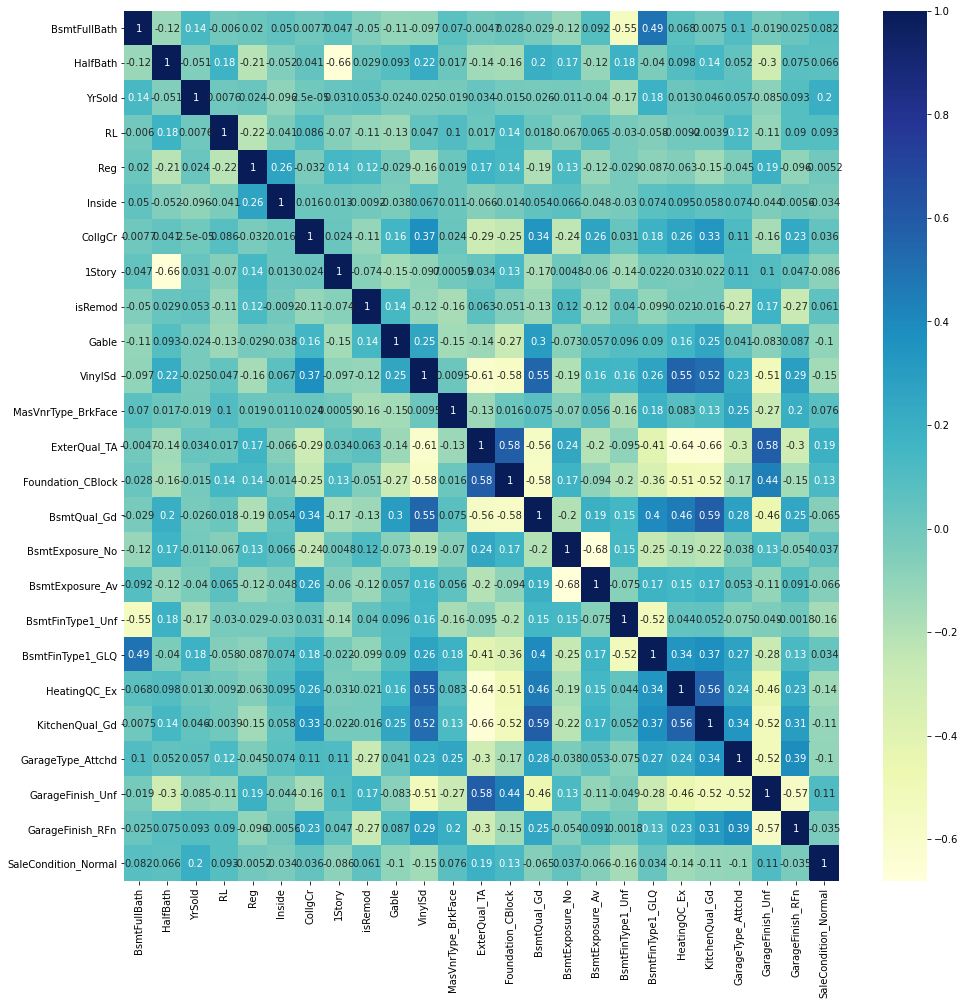

In [451]:
plt.figure(figsize = (16, 16))
sns.heatmap(X_train_smmm.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [452]:

## adding constant 
X_train_smmm = sm.add_constant(X_train_smmm)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_smmm)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())

const                   199227.765870
BsmtFullBath              9321.505145
HalfBath                 12093.974008
YrSold                    4004.455516
RL                       20022.882320
Reg                      -2316.717479
Inside                   -5806.530639
CollgCr                  -9793.200286
1Story                   -8559.467598
isRemod                   9011.441379
Gable                   -17475.792774
VinylSd                  -1938.363461
MasVnrType_BrkFace        -310.830975
ExterQual_TA            -41826.730192
Foundation_CBlock       -21201.942440
BsmtQual_Gd             -16582.507279
BsmtExposure_No          -6992.866657
BsmtExposure_Av          -6915.751617
BsmtFinType1_Unf         13775.102777
BsmtFinType1_GLQ         27865.231054
HeatingQC_Ex             13816.414070
KitchenQual_Gd           -2114.746372
GarageType_Attchd        11825.247191
GarageFinish_Unf        -19845.603151
GarageFinish_RFn          2194.679670
SaleCondition_Normal     -4378.946489
dtype: float

In [453]:
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_smmm.columns
vif['VIF'] = [variance_inflation_factor(X_train_smmm.values, i) for i in range(X_train_smmm.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Feature,VIF
0,const,63.35
23,GarageFinish_Unf,2.98
13,ExterQual_TA,2.92
19,BsmtFinType1_GLQ,2.86
2,HalfBath,2.42
15,BsmtQual_Gd,2.34
21,KitchenQual_Gd,2.34
14,Foundation_CBlock,2.33
11,VinylSd,2.30
18,BsmtFinType1_Unf,2.25


In [454]:
# X_train_sm = sm.add_constant(X_train_smmm)
logm2 = sm.GLM(y_train,X_train_smmm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                  385
Model:                            GLM   Df Residuals:                      359
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 13 Apr 2022   Deviance:                   6.6238e+09
Time:                        22:28:17   Pearson chi2:                 6.06e+28
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.346e+21   2.72e+07   4.94e+13      0.000    1.35e+21    1.35e+21
BsmtFullBath          6.297e+19   8.92e+06   7.06e+12      0.000     6.3e+19     6.3e+19
HalfBath               8.17e+19    1.1e+07   7.42e+12      0.000    8.17e+19    8.17e+19
YrSold                2.705e+19   1.12e+07   2.42e+12      0.000    2.71e+19    2.71e+19
RL                    1.353e+20    1.1e+07   1.23e+13      0.000    1.35e+20    1.35e+20
Reg                  -1.565e+19   7.87e+06  -1.99e+12      0.000   -1.57e+19   -1.57e+19
Inside               -3.923e+19   8.39e+06  -4.68e+12      0.000   -3.92e+19   -3.92e+19
CollgCr              -6.616e+19      1e+07   -6.6e+12      0.000   -6.62e+19   -6.62e+19
1Story               -5.782e+19   1.01e+07  -5.72e+12      0.000   -5.78e+19   -5.78e+19
isRemod               6.088e+19   8.07e+06   7.55e+12      0.000    6.09e+19    6.09e+19
Gable                -1.181e+20   1.01e+07  -1.17e+13      0.000   -1.18e+20   -1.18e+20
VinylSd              -1.309e+19   1.04e+07  -1.26e+12      0.000   -1.31e+19   -1.31e+19
MasVnrType_BrkFace     -2.1e+18   8.25e+06  -2.55e+11      0.000    -2.1e+18    -2.1e+18
ExterQual_TA         -2.826e+20   1.17e+07  -2.41e+13      0.000   -2.83e+20   -2.83e+20
Foundation_CBlock    -1.432e+20   1.12e+07  -1.28e+13      0.000   -1.43e+20   -1.43e+20
BsmtQual_Gd           -1.12e+20   1.05e+07  -1.06e+13      0.000   -1.12e+20   -1.12e+20
BsmtExposure_No      -4.724e+19   1.04e+07  -4.55e+12      0.000   -4.72e+19   -4.72e+19
BsmtExposure_Av      -4.672e+19   1.21e+07  -3.87e+12      0.000   -4.67e+19   -4.67e+19
BsmtFinType1_Unf      9.306e+19   1.09e+07   8.53e+12      0.000    9.31e+19    9.31e+19
BsmtFinType1_GLQ      1.882e+20   1.21e+07   1.56e+13      0.000    1.88e+20    1.88e+20
HeatingQC_Ex          9.334e+19   9.97e+06   9.36e+12      0.000    9.33e+19    9.33e+19
KitchenQual_Gd       -1.429e+19   1.05e+07  -1.37e+12      0.000   -1.43e+19   -1.43e+19
GarageType_Attchd     7.988e+19   9.86e+06    8.1e+12      0.000    7.99e+19    7.99e+19
GarageFinish_Unf     -1.341e+20   1.24e+07  -1.08e+13      0.000   -1.34e+20   -1.34e+20
GarageFinish_RFn      1.483e+19   9.25e+06    1.6e+12      0.000    1.48e+19    1.48e+19
SaleCondition_Normal -2.958e+19   9.39e+06  -3.15e+12      0.000   -2.96e+19   -2.96e+19
========================================================================================
"""

In [455]:
# now we have variable with 
#1. High P value and high VIF ---  Drop
#2. High P value and low VIF -- remove this first 
#3. Low P value and High VIF -- remove this after the one above
#4. Low P value and Low VIF ---  is significant

In [456]:
# dropping BsmtFinSF2 now having both  VIF and P value high

# X_train_sm = X_train_sm.drop(['BsmtFinSF2'], axis=1)
# ## adding constant 
# X_train_sm = sm.add_constant(X_train_sm)
# # lets create amodel for now 
# lr = sm.OLS(y_train, X_train_sm)
# # fit 
# lr_model = lr.fit()
# # params
# lr_model.params

In [457]:
# lr_model.summary()

In [458]:
# # again checking VIF
# vif = pd.DataFrame()
# vif['Feature'] = X_train_sm.columns
# vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1]) ]
# vif['VIF'] = round(vif['VIF'] , 2)
# vif = vif.sort_values(by = 'VIF', ascending=False)
# vif

In [459]:
# Lets use Ridge and Lasso to build a better model
from sklearn.feature_selection import SelectFromModel

# Lasso
sel_l1 = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_l1.fit(X_train, np.ravel(y_train,order='C'))
sel_l1.get_support()

array([ True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [460]:
# selected feature from Lasso
selected_feat_lasso = X_train.columns[(sel_l1.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features Lasso: {}'.format(len(selected_feat_lasso)))
selected_feat_lasso

total features: 223
selected features Lasso: 80


Index(['LotFrontage', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'CentralAir', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'MoSold', 'YrSold', 'FV', 'RL', 'Reg', 'Lvl', 'Inside',
       'CollgCr', 'Gilbert', 'Mitchel', 'NAmes', 'NoRidge', 'Sawyer',
       'Somerst', 'Norm', 'TwnhsE', '1Story', '2Story', 'SLvl', 'isRemod',
       'Gable', 'Hip', 'CompShg', 'HdBoard', 'MetalSd', 'Plywood', 'VinylSd',
       'Wd Sdng', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_TA', 'BsmtCond_Fa', 'BsmtExposure_No',
       'BsmtExposure_Av', 'BsmtFinType1_Unf', 'BsmtFinType1_GLQ',
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_Rec',
       'BsmtFinType2_Unf', 'Heating_GasA', 'HeatingQC_Ex', 'HeatingQC_TA',
       'HeatingQC_Gd', 'Electrical

In [461]:
# Ridge  Regularization
sel_l2 = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_l2.fit(X_train, np.ravel(y_train,order='C'))
sel_l2.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [462]:
# selected feature from Ridge regression
selected_feat_ridge = X_train.columns[(sel_l2.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_ridge)))
selected_feat_ridge

total features: 223
selected features: 95


Index([          'LotFrontage',               'LotArea',
                 'OverallQual',           'OverallCond',
                   'YearBuilt',            'MasVnrArea',
                  'BsmtFinSF1',             'BsmtUnfSF',
                 'TotalBsmtSF',            'CentralAir',
                    '1stFlrSF',              '2ndFlrSF',
                   'GrLivArea',          'BsmtFullBath',
                    'FullBath',              'HalfBath',
                'BedroomAbvGr',          'TotRmsAbvGrd',
                  'Fireplaces',           'GarageYrBlt',
                  'GarageCars',            'GarageArea',
                  'WoodDeckSF',           'OpenPorchSF',
                      'MoSold',                'YrSold',
                            60,                     120,
                          'RL',                    'RM',
                         'Reg',                   'Lvl',
                     'CulDSac',                'Inside',
                     'CollgCr',

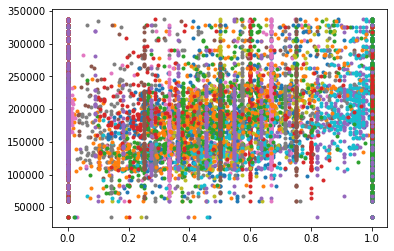

In [463]:
# lets consider Lasso feature selection list 

plt.plot(X_train[list(selected_feat_ridge)],y_train,'.')
plt.show()

In [464]:
# The distribution looks Random and fine

In [465]:
# lets check the  P value and VIF for the ***Lasso feature variables ****
# MODEL 2
X_train_sm_L1 = X_train[list(selected_feat_lasso)]
## adding constant 
X_train_sm_L1 = sm.add_constant(X_train_sm_L1)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1.values, i) for i in range(X_train_sm_L1.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53701.479149
LotFrontage               5528.592997
OverallCond              33627.143800
YearBuilt                66423.752548
MasVnrArea                5206.467745
                             ...     
GarageCond_TA            10721.888914
PavedDrive_Y              -256.460695
SaleType_WD               4559.122988
SaleCondition_Normal     -7963.575689
SaleCondition_Abnorml   -10300.698402
Length: 81, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     45.62
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.82e-130
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8682.
Df

In [466]:
# now we have variable with 
#1. High P value and high VIF ---  Drop ir 1st
#2. High P value and low VIF -- remove this after #1
#3. Low P value and High VIF -- remove this after #2
#4. Low P value and Low VIF ---  is significant

In [467]:
# drop Heating_GasA - with p value 0.998

X_train_sm_L1_2 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_2 = X_train_sm_L1_2.drop('Heating_GasA', axis=1)

# MODEL - 3
X_train_sm_L1_2 = sm.add_constant(X_train_sm_L1_2)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_2)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_2.values, i) for i in range(X_train_sm_L1_2.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)



const                    53700.840629
LotFrontage               5527.767986
OverallCond              33628.315405
YearBuilt                66421.896747
MasVnrArea                5205.656739
                             ...     
GarageCond_TA            10709.664851
PavedDrive_Y              -251.450967
SaleType_WD               4558.694799
SaleCondition_Normal     -7963.210258
SaleCondition_Abnorml   -10300.212562
Length: 80, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     46.36
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.67e-131
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8680.
Df

--------------------------------
VIF for lasso selected features
         Feature      VIF
37         Gable      inf
38           Hip      inf
39       CompShg      inf
0          const  1014.52
47  ExterQual_TA    38.10
..           ...      ...
28       NoRidge     1.42
23        Inside     1.42
31          Norm     1.39
48  ExterCond_TA     1.38
17        MoSold     1.29

[80 rows x 2 columns]


In [468]:
# drop MasVnrType_BrkFace with P-value = 0.984
X_train_sm_L1_3 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_3 = X_train_sm_L1_3.drop('Heating_GasA', axis=1)
X_train_sm_L1_3 = X_train_sm_L1_3.drop('MasVnrType_BrkFace', axis=1)

# MODEL - 4
X_train_sm_L1_3 = sm.add_constant(X_train_sm_L1_3)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_3)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_3.values, i) for i in range(X_train_sm_L1_3.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53749.974427
LotFrontage               5514.158092
OverallCond              33627.011379
YearBuilt                66404.410987
MasVnrArea                5256.507367
                             ...     
GarageCond_TA            10713.119857
PavedDrive_Y              -250.842116
SaleType_WD               4560.259154
SaleCondition_Normal     -7960.739048
SaleCondition_Abnorml   -10299.011098
Length: 79, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     47.11
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.87e-132
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8678.
Df

--------------------------------
VIF for lasso selected features
         Feature      VIF
39       CompShg      inf
37         Gable      inf
38           Hip      inf
0          const  1006.81
46  ExterQual_TA    38.10
..           ...      ...
28       NoRidge     1.42
23        Inside     1.42
31          Norm     1.39
47  ExterCond_TA     1.38
17        MoSold     1.29

[79 rows x 2 columns]


In [469]:
# remove PavedDrive_Y with high P-value = 0.968
X_train_sm_L1_4 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_4 = X_train_sm_L1_4.drop('Heating_GasA', axis=1)
X_train_sm_L1_4 = X_train_sm_L1_4.drop('MasVnrType_BrkFace', axis=1)
X_train_sm_L1_4 = X_train_sm_L1_4.drop('PavedDrive_Y', axis=1)
# MODEL - 5
X_train_sm_L1_4 = sm.add_constant(X_train_sm_L1_4)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_4)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_4.values, i) for i in range(X_train_sm_L1_4.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53548.663012
LotFrontage               5517.974626
OverallCond              33558.870429
YearBuilt                66290.862600
MasVnrArea                5254.497484
                             ...     
GarageQual_TA             7464.664382
GarageCond_TA            10668.114179
SaleType_WD               4572.346818
SaleCondition_Normal     -7972.825144
SaleCondition_Abnorml   -10314.338319
Length: 78, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     47.89
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.57e-133
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8676.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
39       CompShg     inf
37         Gable     inf
38           Hip     inf
0          const  974.94
46  ExterQual_TA   38.08
..           ...     ...
28       NoRidge    1.42
22           Lvl    1.41
31          Norm    1.39
47  ExterCond_TA    1.37
17        MoSold    1.28

[78 rows x 2 columns]


In [470]:
# remove BsmtFinType1_Rec with high P value = 0.958

X_train_sm_L1_5 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_5 = X_train_sm_L1_5.drop('Heating_GasA', axis=1)
X_train_sm_L1_5 = X_train_sm_L1_5.drop('MasVnrType_BrkFace', axis=1)
X_train_sm_L1_5 = X_train_sm_L1_5.drop('PavedDrive_Y', axis=1)
X_train_sm_L1_5 = X_train_sm_L1_5.drop('BsmtFinType1_Rec', axis=1)
# MODEL - 6
X_train_sm_L1_5 = sm.add_constant(X_train_sm_L1_5)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_5)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_5.values, i) for i in range(X_train_sm_L1_5.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)




const                    53538.568017
LotFrontage               5534.845059
OverallCond              33581.293257
YearBuilt                66163.571448
MasVnrArea                5268.539578
                             ...     
GarageQual_TA             7488.439707
GarageCond_TA            10645.027461
SaleType_WD               4585.591731
SaleCondition_Normal     -8000.658693
SaleCondition_Abnorml   -10341.043195
Length: 77, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     48.68
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.96e-134
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8674.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
38           Hip     inf
37         Gable     inf
39       CompShg     inf
0          const  974.90
46  ExterQual_TA   38.08
..           ...     ...
22           Lvl    1.41
23        Inside    1.41
31          Norm    1.39
47  ExterCond_TA    1.35
17        MoSold    1.27

[77 rows x 2 columns]


In [471]:
# remove HeatingQC_Gd with high P-value = 0.920
X_train_sm_L1_6 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_6 = X_train_sm_L1_6.drop('Heating_GasA', axis=1)
X_train_sm_L1_6 = X_train_sm_L1_6.drop('MasVnrType_BrkFace', axis=1)
X_train_sm_L1_6 = X_train_sm_L1_6.drop('PavedDrive_Y', axis=1)
X_train_sm_L1_6 = X_train_sm_L1_6.drop('BsmtFinType1_Rec', axis=1)
X_train_sm_L1_6 = X_train_sm_L1_6.drop('HeatingQC_Gd', axis=1)

# MODEL - 7
X_train_sm_L1_6 = sm.add_constant(X_train_sm_L1_6)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_6)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_6.values, i) for i in range(X_train_sm_L1_6.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53617.562948
LotFrontage               5544.933729
OverallCond              33598.585023
YearBuilt                66178.376944
MasVnrArea                5266.312158
                             ...     
GarageQual_TA             7560.557016
GarageCond_TA            10700.891745
SaleType_WD               4547.871541
SaleCondition_Normal     -8001.711803
SaleCondition_Abnorml   -10329.267058
Length: 76, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     49.50
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.13e-134
Time:                        22:28:19   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8672.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
38           Hip     inf
37         Gable     inf
39       CompShg     inf
0          const  974.10
46  ExterQual_TA   37.95
..           ...     ...
23        Inside    1.41
22           Lvl    1.40
31          Norm    1.39
47  ExterCond_TA    1.35
17        MoSold    1.27

[76 rows x 2 columns]


In [472]:
# remove HeatingQC_Ex with high P-value = 0.978
X_train_sm_L1_7 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_7 = X_train_sm_L1_7.drop(['Heating_GasA', 'MasVnrType_BrkFace', 'PavedDrive_Y', 'BsmtFinType1_Rec', 'HeatingQC_Gd', 'HeatingQC_Ex'], axis=1)

# MODEL - 8
X_train_sm_L1_7 = sm.add_constant(X_train_sm_L1_7)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_7)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_7.values, i) for i in range(X_train_sm_L1_7.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53634.574904
LotFrontage               5529.878862
OverallCond              33575.107581
YearBuilt                66157.767842
MasVnrArea                5265.586397
                             ...     
GarageQual_TA             7569.467918
GarageCond_TA            10692.217670
SaleType_WD               4536.476578
SaleCondition_Normal     -7994.424707
SaleCondition_Abnorml   -10334.641740
Length: 75, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.59e-135
Time:                        22:28:20   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8670.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
37         Gable     inf
38           Hip     inf
39       CompShg     inf
0          const  973.62
46  ExterQual_TA   37.84
..           ...     ...
28       NoRidge    1.41
31          Norm    1.39
22           Lvl    1.38
47  ExterCond_TA    1.35
17        MoSold    1.27

[75 rows x 2 columns]


In [473]:
# remove reg with high P-value = 0.837
X_train_sm_L1_8 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_8 = X_train_sm_L1_8.drop(['Heating_GasA', 'MasVnrType_BrkFace', 'PavedDrive_Y', 'BsmtFinType1_Rec', 'HeatingQC_Gd', 'HeatingQC_Ex', 'Reg'], axis=1)

# MODEL - 9
X_train_sm_L1_8 = sm.add_constant(X_train_sm_L1_8)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_8)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_8.values, i) for i in range(X_train_sm_L1_8.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)

const                    53235.423803
LotFrontage               5379.702628
OverallCond              33593.305495
YearBuilt                66307.603390
MasVnrArea                5206.664150
                             ...     
GarageQual_TA             7699.880272
GarageCond_TA            10628.818220
SaleType_WD               4493.998827
SaleCondition_Normal     -7965.621452
SaleCondition_Abnorml   -10326.455840
Length: 74, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     51.19
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.26e-136
Time:                        22:28:20   Log-Likelihood:                -4261.0
No. Observations:                 385   AIC:                             8668.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
37           Hip     inf
36         Gable     inf
38       CompShg     inf
0          const  968.78
45  ExterQual_TA   37.73
..           ...     ...
30          Norm    1.38
21           Lvl    1.37
22        Inside    1.36
46  ExterCond_TA    1.35
17        MoSold    1.27

[74 rows x 2 columns]


In [474]:
# remove Electrical_SBrkr with high P-value = 0.756
X_train_sm_L1_9 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_9 = X_train_sm_L1_9.drop(['Heating_GasA', 'MasVnrType_BrkFace', 'PavedDrive_Y', 'BsmtFinType1_Rec', 'HeatingQC_Gd', 'HeatingQC_Ex', 'Reg', 'Electrical_SBrkr'], axis=1)

# MODEL - 10
X_train_sm_L1_9 = sm.add_constant(X_train_sm_L1_9)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_9)

# fit 
lr_model = lr.fit()

# params
print(lr_model.params)
print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_9.values, i) for i in range(X_train_sm_L1_9.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
print("--------------------------------")
print("VIF for lasso selected features")
print(vif)
print("Highest P-value : ",max(lr_model.pvalues))

const                    54307.392011
LotFrontage               5397.828389
OverallCond              33140.643862
YearBuilt                65628.872844
MasVnrArea                5176.479138
                             ...     
GarageQual_TA             7691.926603
GarageCond_TA            10731.423459
SaleType_WD               4385.398756
SaleCondition_Normal     -7901.623027
SaleCondition_Abnorml   -10326.241511
Length: 73, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     52.06
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.26e-137
Time:                        22:28:20   Log-Likelihood:                -4261.1
No. Observations:                 385   AIC:                             8666.
Df

--------------------------------
VIF for lasso selected features
         Feature     VIF
36         Gable     inf
37           Hip     inf
38       CompShg     inf
0          const  953.38
45  ExterQual_TA   37.61
..           ...     ...
30          Norm    1.38
22        Inside    1.36
21           Lvl    1.36
46  ExterCond_TA    1.33
17        MoSold    1.27

[73 rows x 2 columns]
Highest P-value :  0.7340851272285431


In [475]:
# remove Gilbert with high P-value 0.734
X_train_sm_L1_10 = X_train[list(selected_feat_lasso)]
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['Heating_GasA', 'MasVnrType_BrkFace', 'PavedDrive_Y', 'BsmtFinType1_Rec', 'HeatingQC_Gd', 'HeatingQC_Ex', 'Reg', 'Electrical_SBrkr', 'Gilbert', 'BsmtFinType1_ALQ','NAmes'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['Foundation_PConc','Foundation_CBlock','CentralAir','Mitchel','BsmtCond_Fa'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['Plywood','Wd Sdng','CollgCr','ExterCond_TA','GarageFinish_Unf'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['Gable','Hip'], axis=1)

# infinite value of VIF is removed after removing 'Gable'
# Proceeding further elimination of features, check , drop and again check one by one 

X_train_sm_L1_10 = X_train_sm_L1_10.drop(['ExterQual_Gd','CompShg','Lvl','GarageQual_TA','Sawyer','BsmtFinType1_BLQ'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['BsmtFinType1_Unf','MoSold','Inside','MasVnrArea','RL','SaleType_WD'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['FV','GarageCars','MetalSd','YrSold','VinylSd','LotFrontage','HdBoard'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['GarageFinish_RFn','GarageCond_TA','GarageYrBlt','HalfBath','SaleCondition_Normal'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['SaleCondition_Abnorml','BedroomAbvGr','TwnhsE','BsmtFullBath','HeatingQC_TA','BsmtExposure_No'], axis=1)
X_train_sm_L1_10 = X_train_sm_L1_10.drop(['SLvl'], axis=1)

# MODEL - 11
X_train_sm_L1_10 = sm.add_constant(X_train_sm_L1_10)
 
# lets create amodel for now 
lr = sm.OLS(y_train, X_train_sm_L1_10)

# fit 
lr_model = lr.fit()

# params
#print(lr_model.params)
#print(lr_model.summary())
# create a dataframe that will have all the feature variable and thr VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_sm_L1_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_L1_10.values, i) for i in range(X_train_sm_L1_10.shape[1]) ]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

print("--------------------------------")
print("VIF for lasso selected features")
print(vif.head())
print("--------------------------------")
print(X_train_sm_L1_10.shape)
print("--------------------------------")
print("Highest P-value : ",max(lr_model.pvalues))
print("--------------------------------")
print("Rsquared Value : ",lr_model.rsquared)
print("================================")
print("non-significant Features")
cnt = 0
for column in X_train_sm_L1_10:
    if lr_model.pvalues[column] > 0.05:
        print(f"Variable: {column}, p-value: {lr_model.pvalues[column]:0.3f}")
        cnt = cnt + 1
        
if cnt==0 :
    print("Not Present")
        
        

--------------------------------
VIF for lasso selected features
           Feature     VIF
0            const  222.87
4        BsmtUnfSF    8.92
3       BsmtFinSF1    8.25
22  KitchenQual_TA    7.47
23  KitchenQual_Gd    6.72
--------------------------------
(385, 27)
--------------------------------
Highest P-value :  0.047535104518988444
--------------------------------
Rsquared Value :  0.9079331071817143
non-significant Features
Not Present


In [476]:
#Final Model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.10e-168
Time:                        22:28:20   Log-Likelihood:                -4292.8
No. Observations:                 385   AIC:                             8640.
Df Residuals:                     358   BIC:                             8746.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.322e+04   1.33e+0

In [477]:
y_train_pred = lr_model.predict(X_train_sm_L1_10)
r2_score(y_train, y_train_pred)

0.9079331071817143

In [478]:
#X_train_sm_L1_10.pop('const')
list(X_train_sm_L1_10.shape)
X_train_sm_L1_10.columns

Index(['const', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'NoRidge',
       'Somerst', 'Norm', '1Story', '2Story', 'isRemod', 'ExterQual_TA',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_TA', 'BsmtExposure_Av',
       'BsmtFinType1_GLQ', 'BsmtFinType2_Unf', 'KitchenQual_TA',
       'KitchenQual_Gd', 'Functional_Typ', 'GarageType_Attchd',
       'GarageType_Detchd'],
      dtype='object')

In [479]:

X_test_sm = X_test[['OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'NoRidge',
       'Somerst', 'Norm', '1Story', '2Story', 'isRemod', 'ExterQual_TA',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_TA', 'BsmtExposure_Av',
       'BsmtFinType1_GLQ', 'BsmtFinType2_Unf', 'KitchenQual_TA',
       'KitchenQual_Gd', 'Functional_Typ', 'GarageType_Attchd',
       'GarageType_Detchd']]
X_test_sm = sm.add_constant(X_test_sm)

In [480]:

y_test_pred = lr_model.predict(X_test_sm)

In [481]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

-19200151.548358623